In [4]:
#Data Loading & Initial Checks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

df = pd.read_csv('Automobile+29.csv')
print(f"Initial shape: {df.shape}")
print("\nData Types Before Conversion:")
print(df.dtypes)

Initial shape: (201, 26)

Data Types Before Conversion:
symboling                int64
normalized_losses        int64
make                    object
fuel_type               object
aspiration              object
number_of_doors         object
body_style              object
drive_wheels            object
engine_location         object
wheel_base             float64
length                 float64
width                  float64
height                 float64
curb_weight              int64
engine_type             object
number_of_cylinders     object
engine_size              int64
fuel_system             object
bore                   float64
stroke                 float64
compression_ratio      float64
horsepower               int64
peak_rpm                 int64
city_mpg                 int64
highway_mpg              int64
price                    int64
dtype: object


In [6]:
# Data Type Conversion
# Convert problematic numeric columns
numeric_cols_with_issues = ['price', 'bore', 'stroke', 'horsepower', 'peak_rpm']
for col in numeric_cols_with_issues:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert categorical columns
categorical_cols = ['make', 'fuel_type', 'aspiration', 'body_style', 
                   'drive_wheels', 'engine_type', 'fuel_system']
df[categorical_cols] = df[categorical_cols].astype('category')

print("\nData Types After Conversion:")
print(df.dtypes)


Data Types After Conversion:
symboling                 int64
normalized_losses         int64
make                   category
fuel_type              category
aspiration             category
number_of_doors          object
body_style             category
drive_wheels           category
engine_location          object
wheel_base              float64
length                  float64
width                   float64
height                  float64
curb_weight               int64
engine_type            category
number_of_cylinders      object
engine_size               int64
fuel_system            category
bore                    float64
stroke                  float64
compression_ratio       float64
horsepower                int64
peak_rpm                  int64
city_mpg                  int64
highway_mpg               int64
price                     int64
dtype: object


In [8]:
# Missing Value Treatment
# Numerical columns: Median imputation
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical columns: Mode imputation
cat_cols = df.select_dtypes(include='category').columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

print("\nMissing Values After Treatment:")
print(df.isnull().sum())


Missing Values After Treatment:
symboling              0
normalized_losses      0
make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               0
city_mpg               0
highway_mpg            0
price                  0
dtype: int64


In [10]:
#Feature Engineering
# Create new features
df['power_to_weight'] = df['horsepower'] / df['curb_weight']
df['fuel_efficiency'] = (df['city_mpg'] + df['highway_mpg']) / 2

# Price segmentation
df['price_segment'] = pd.qcut(df['price'], q=4, labels=['Budget','Mid-Range','Premium','Luxury'])

In [12]:
# Exploratory Data Analysis

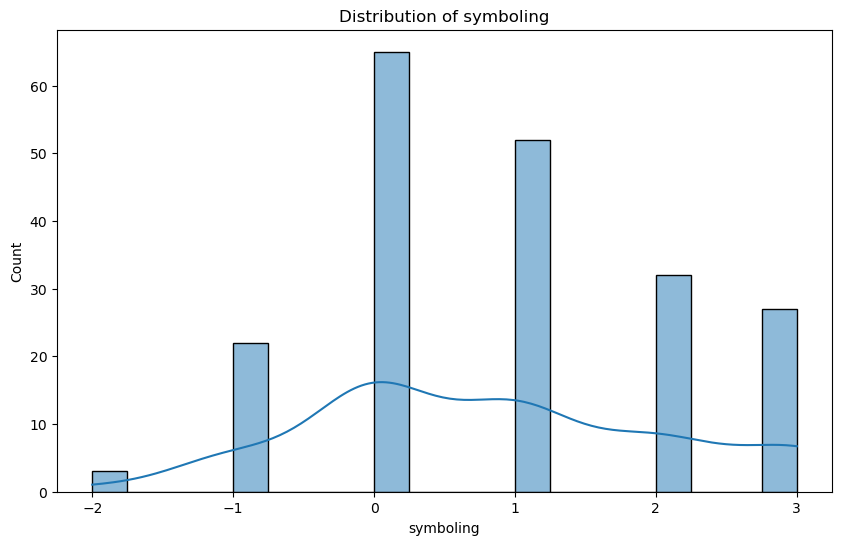

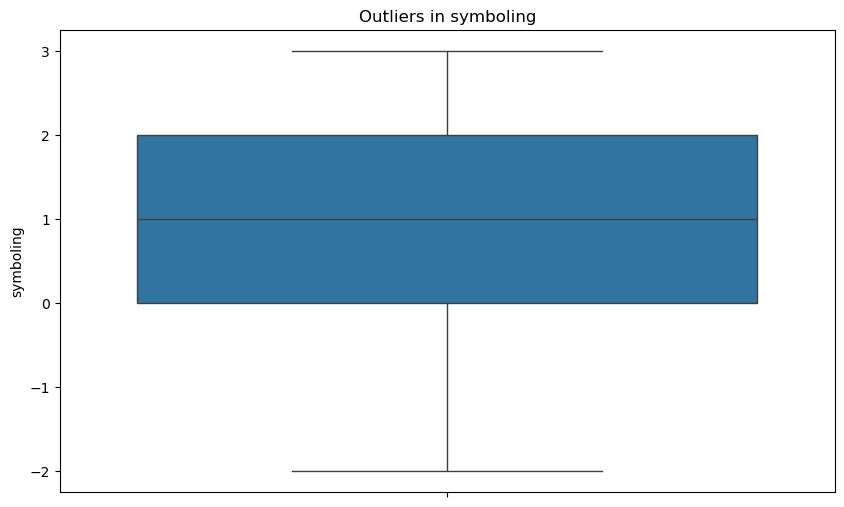

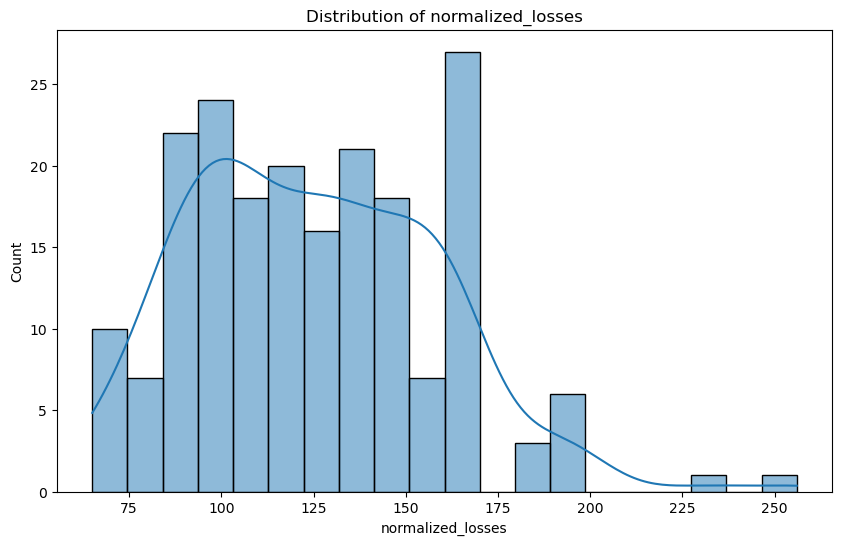

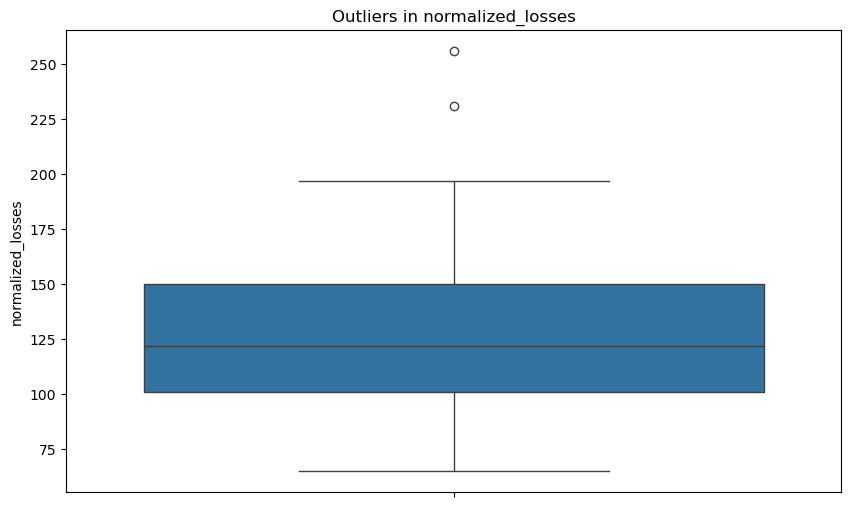

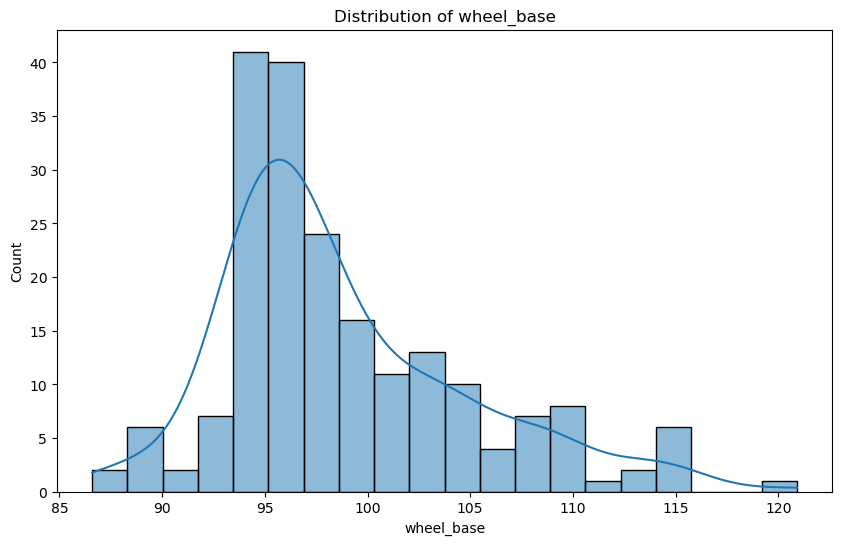

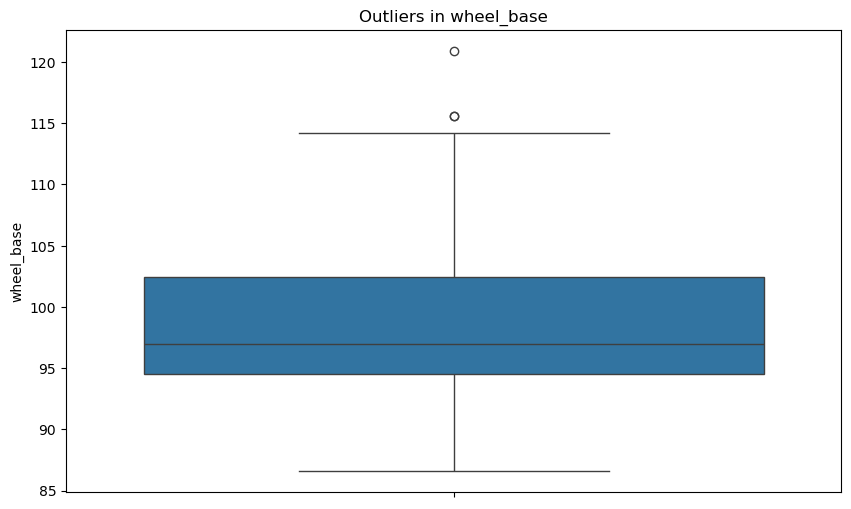

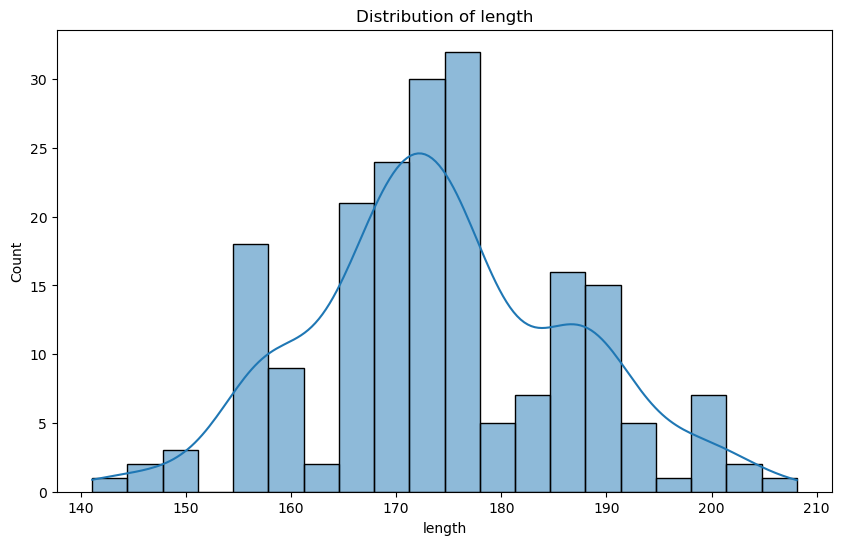

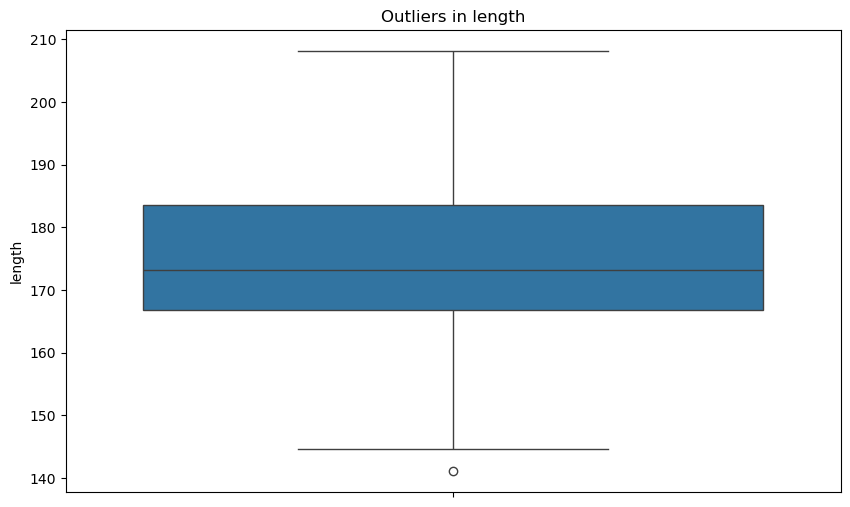

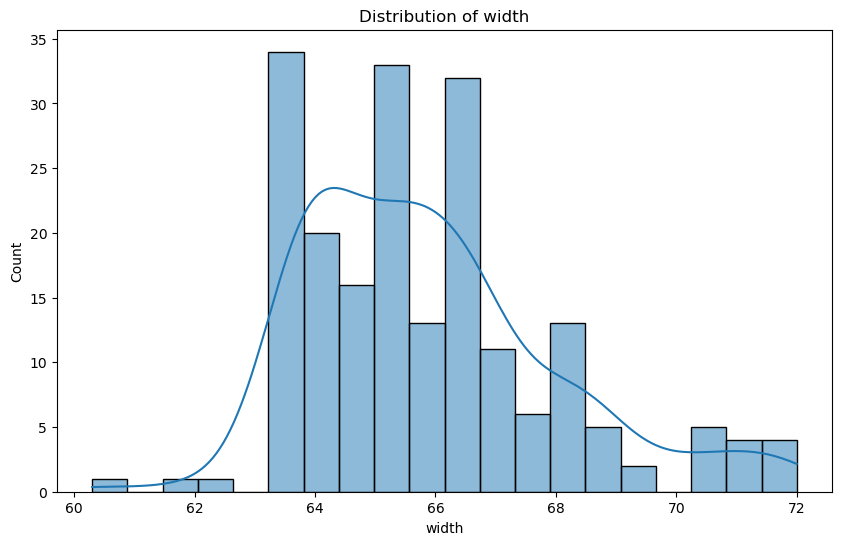

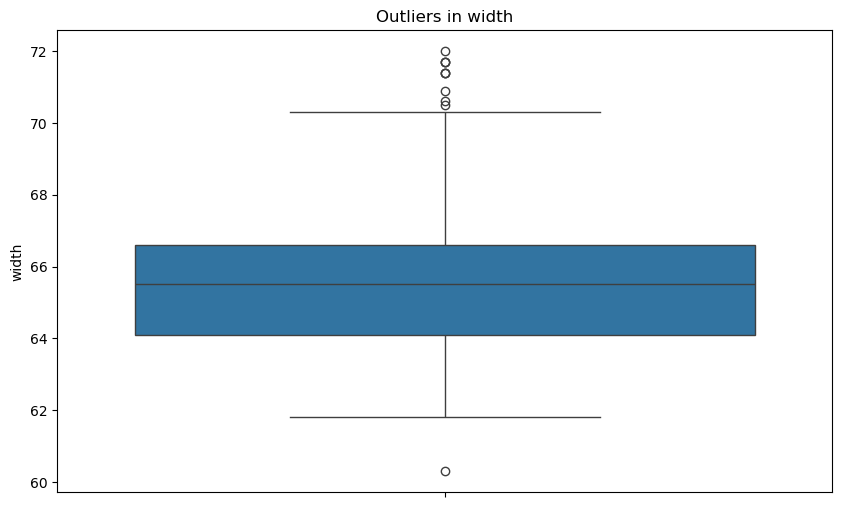

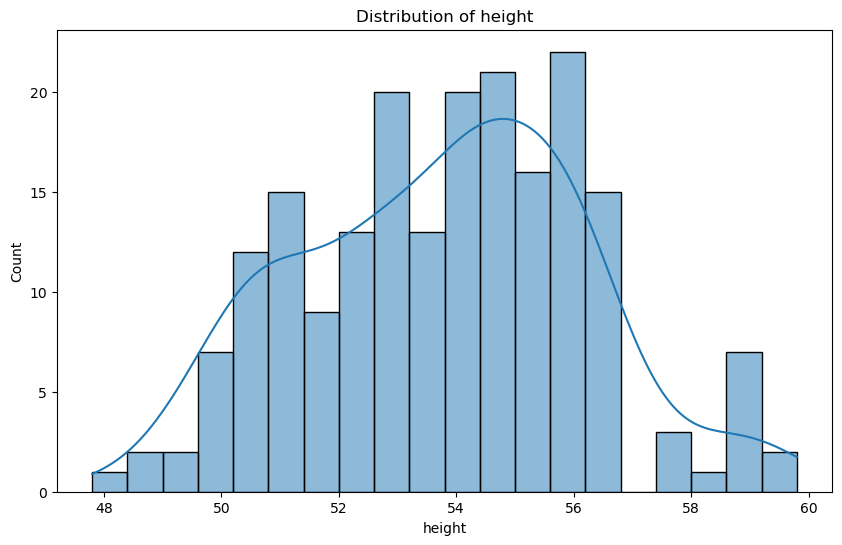

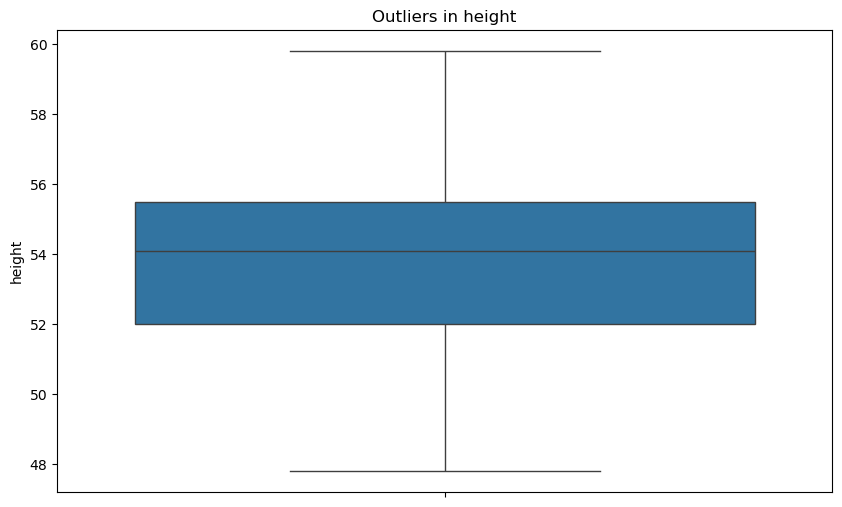

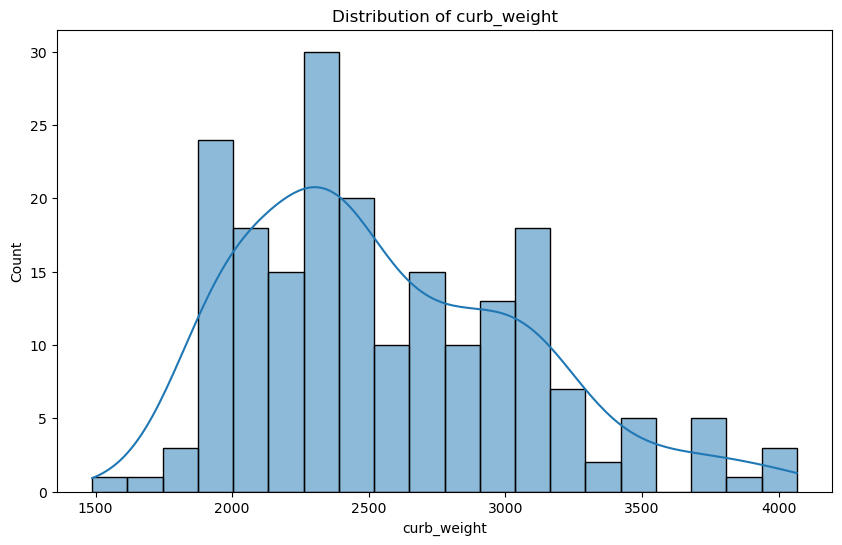

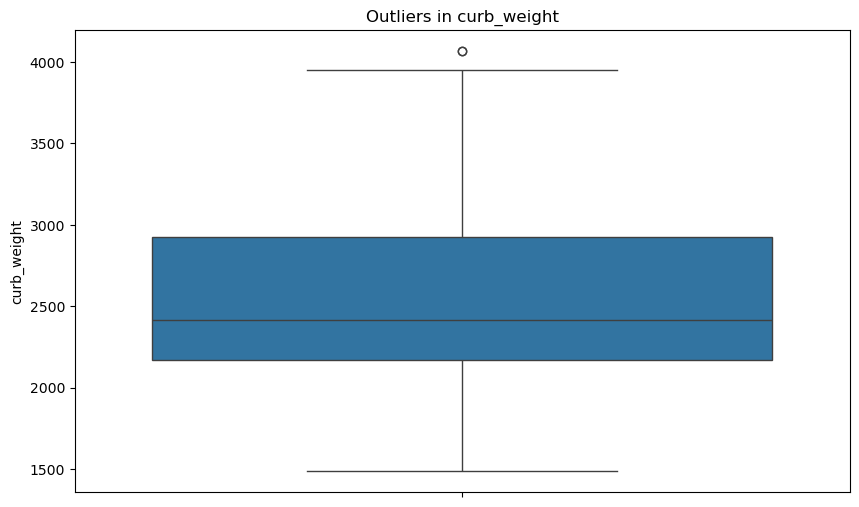

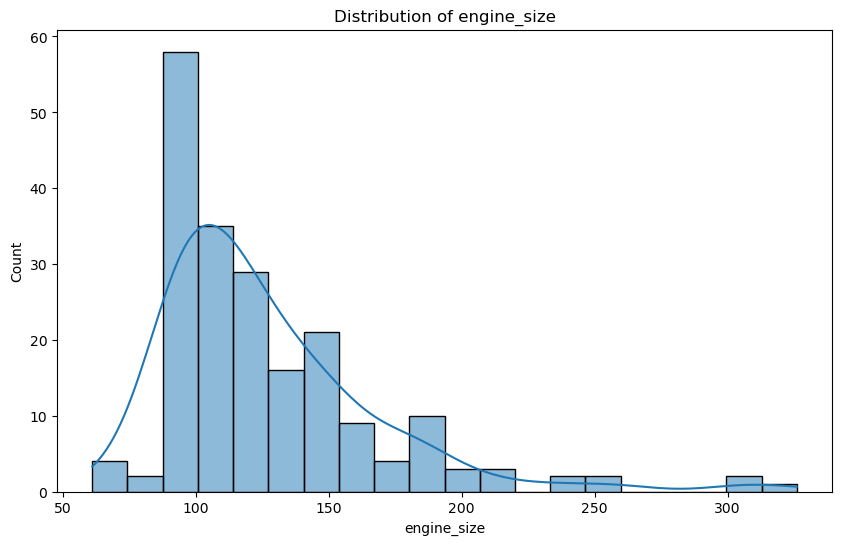

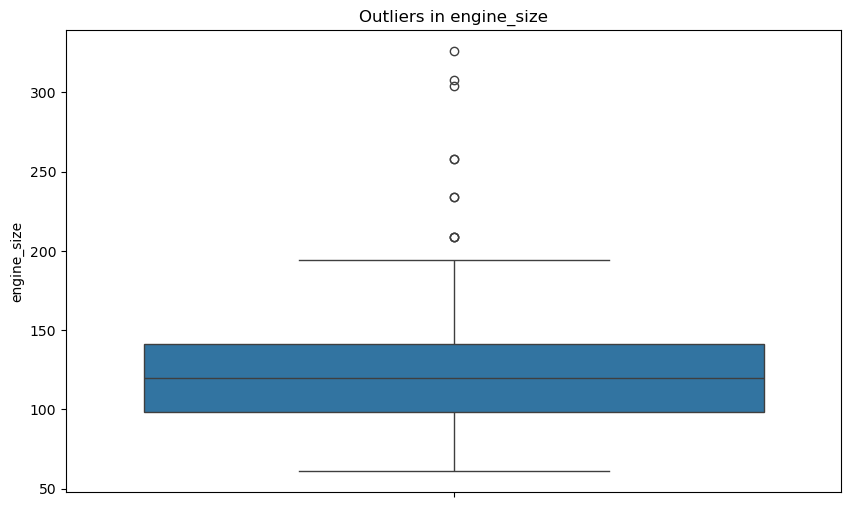

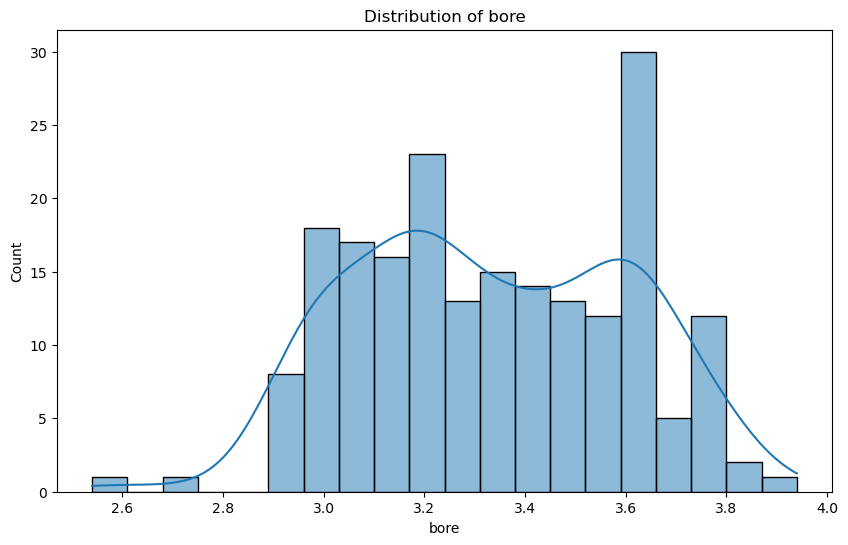

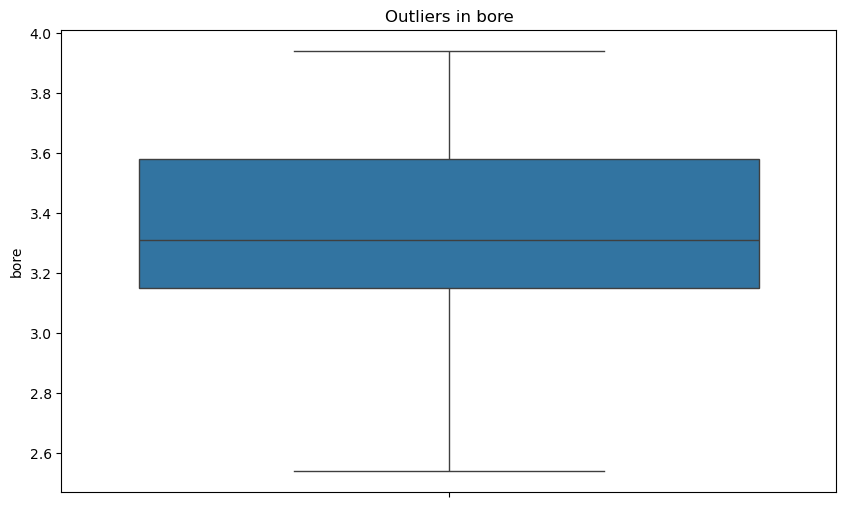

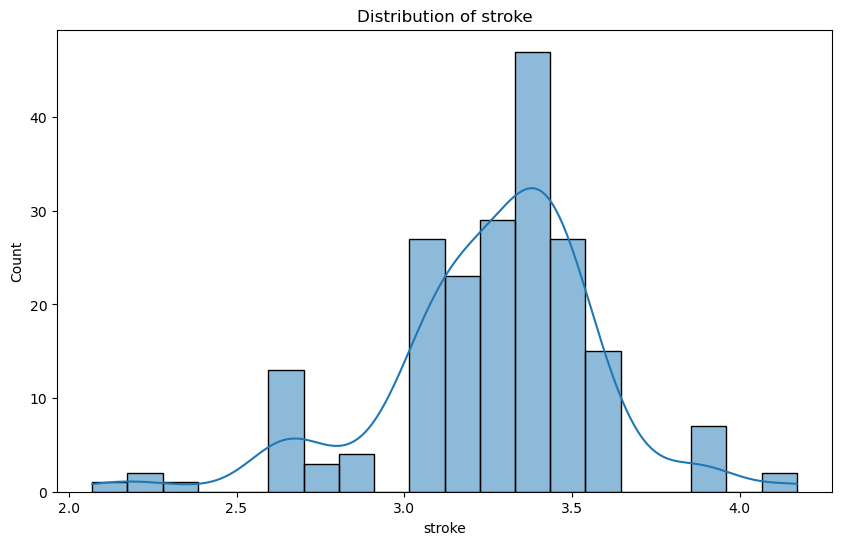

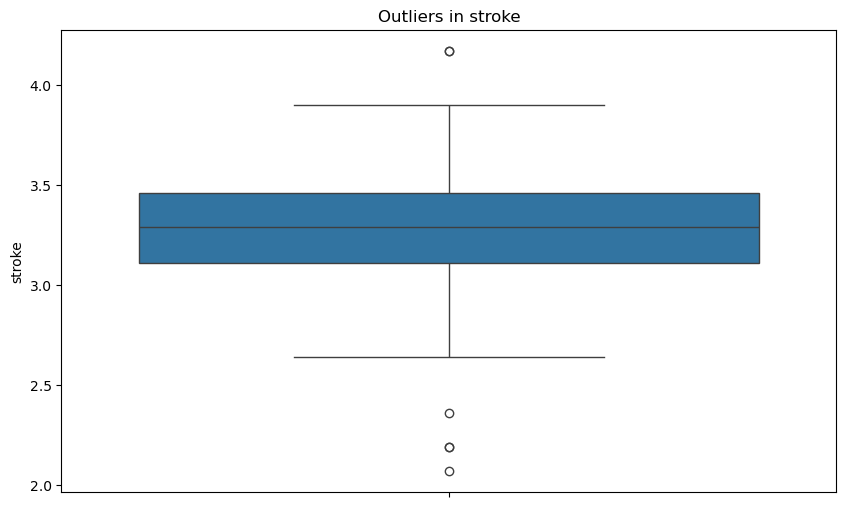

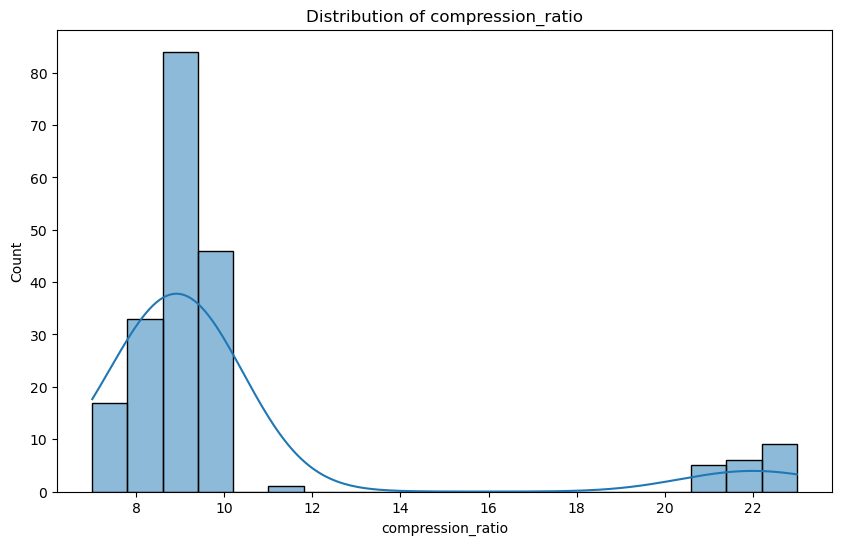

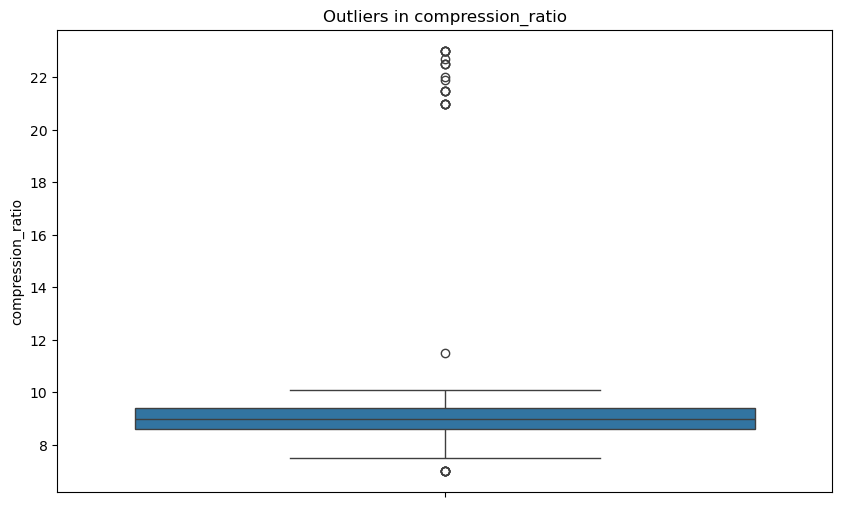

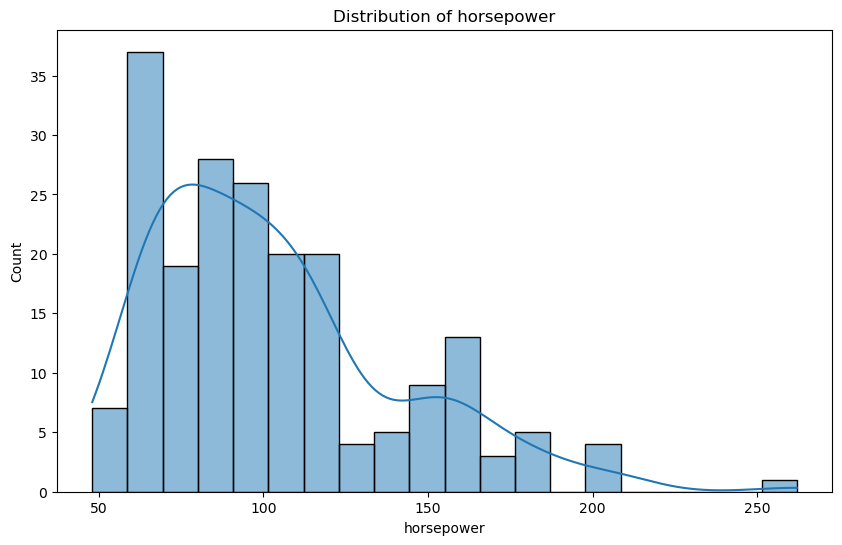

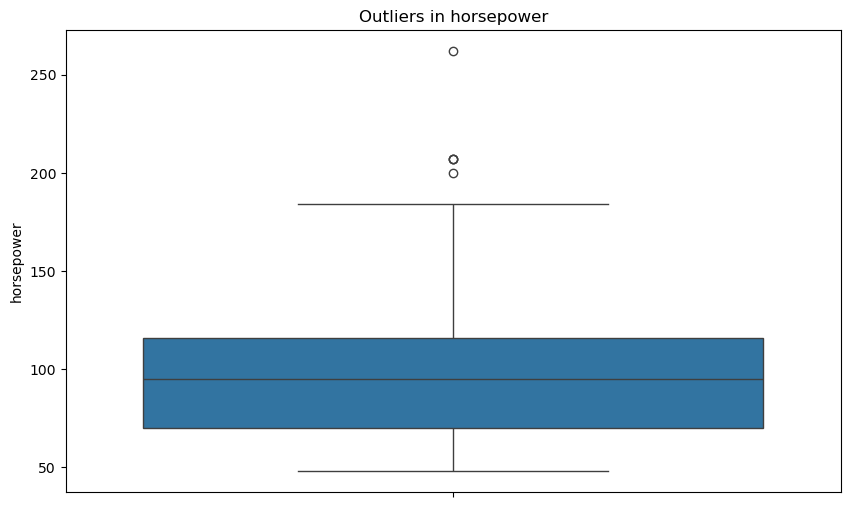

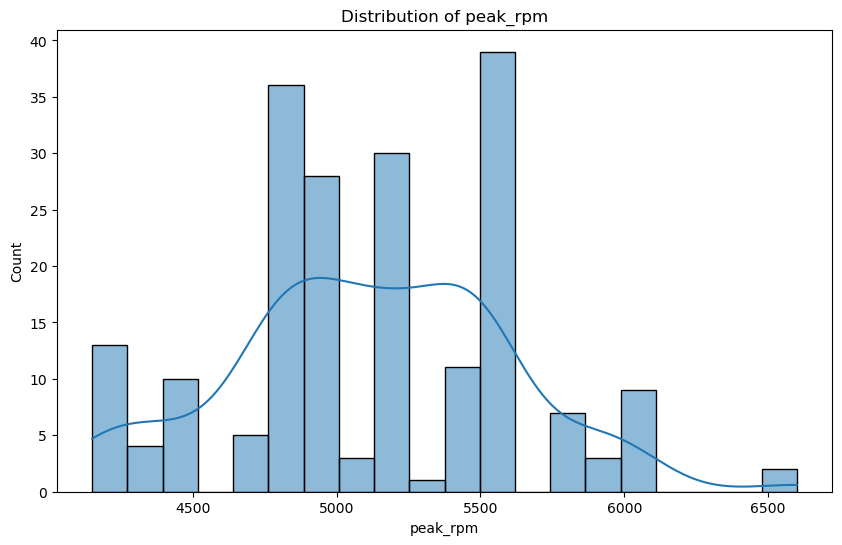

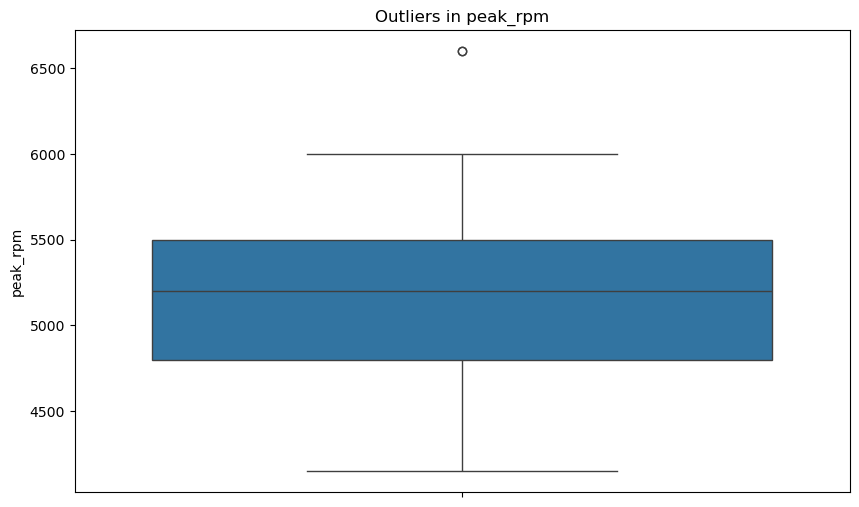

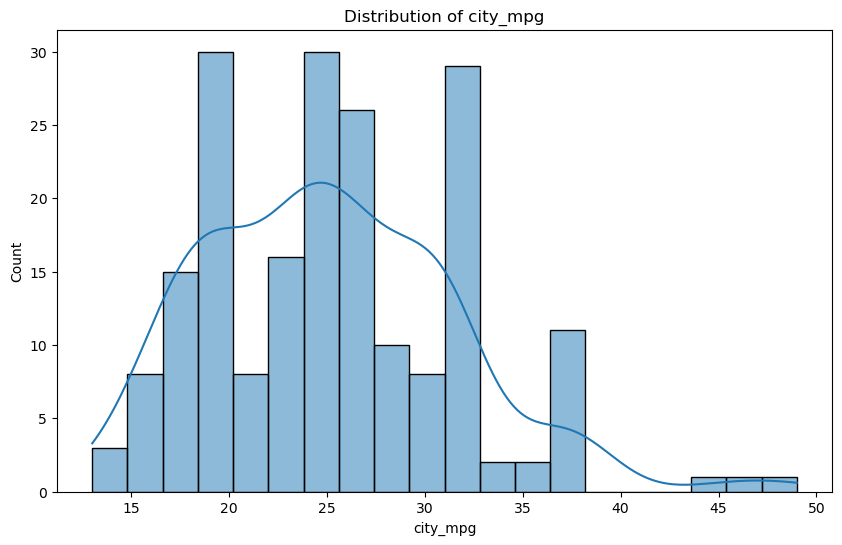

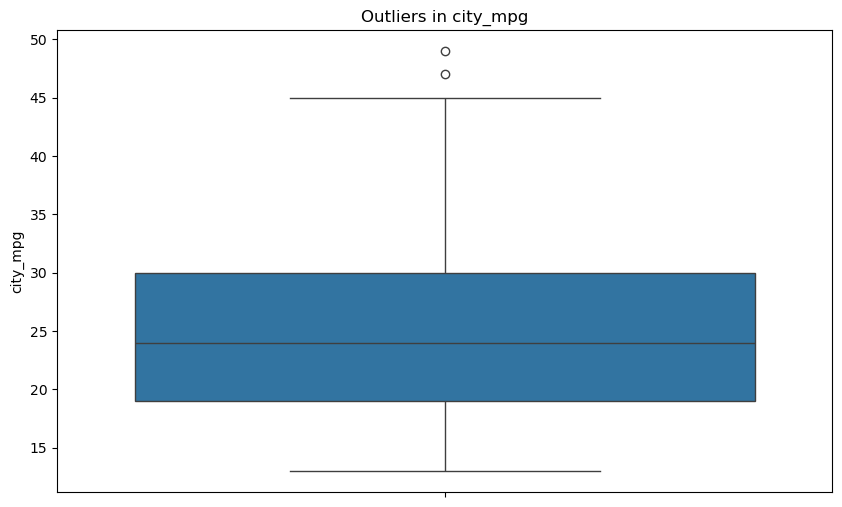

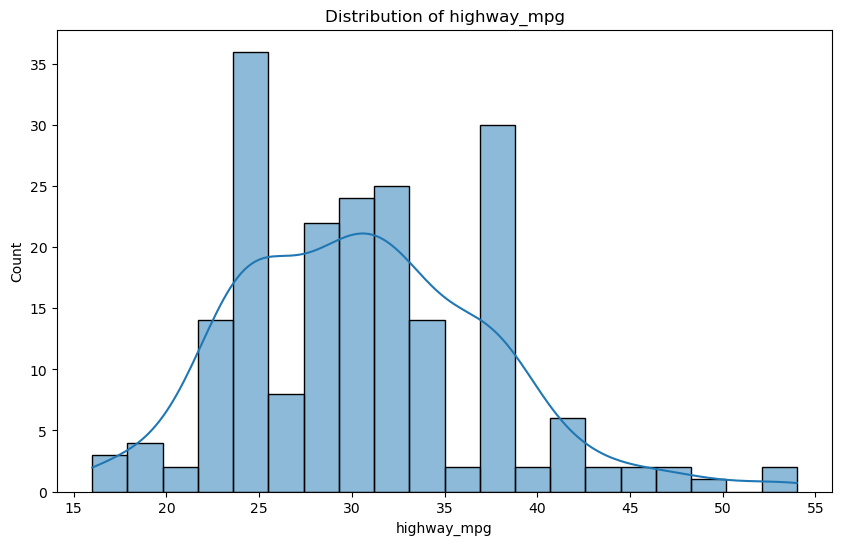

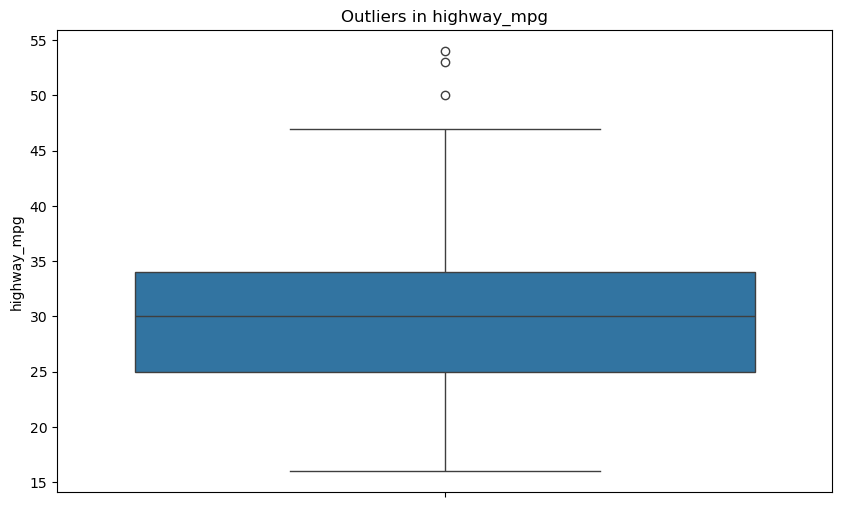

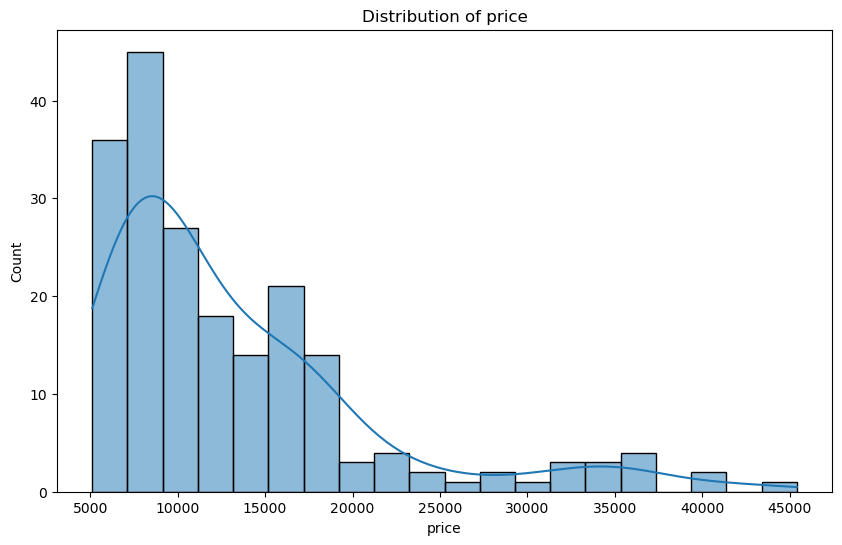

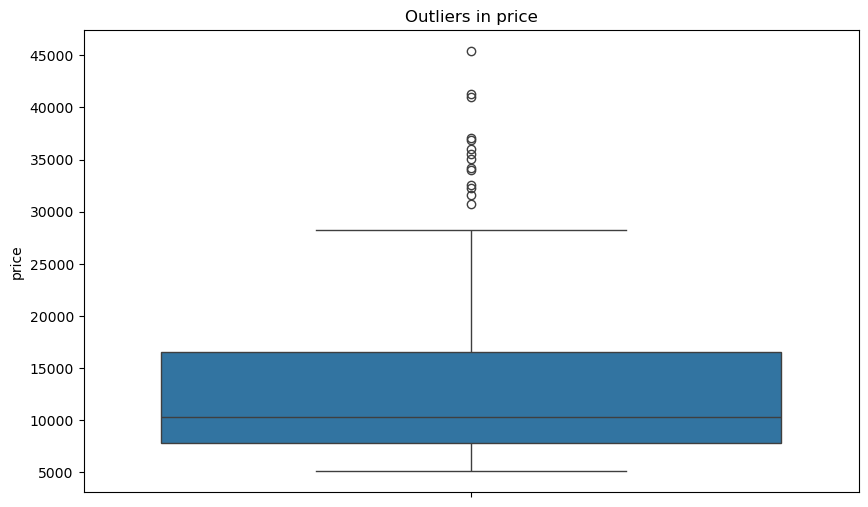

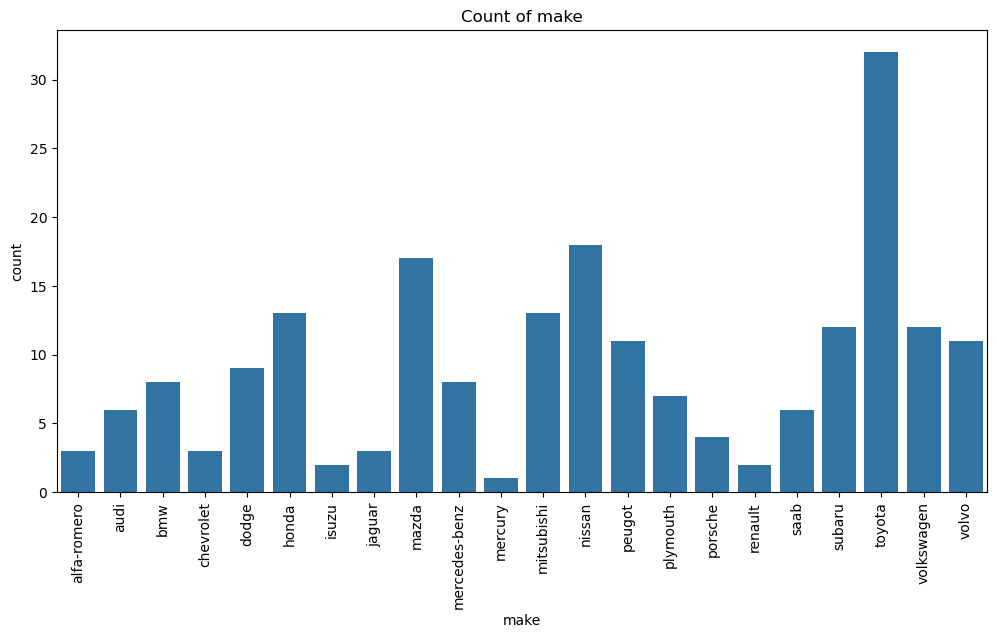

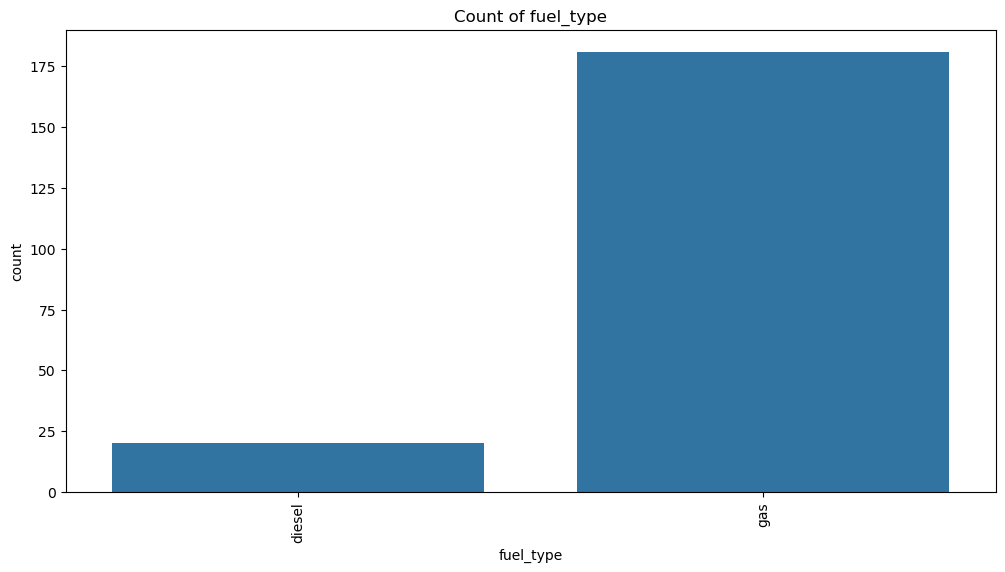

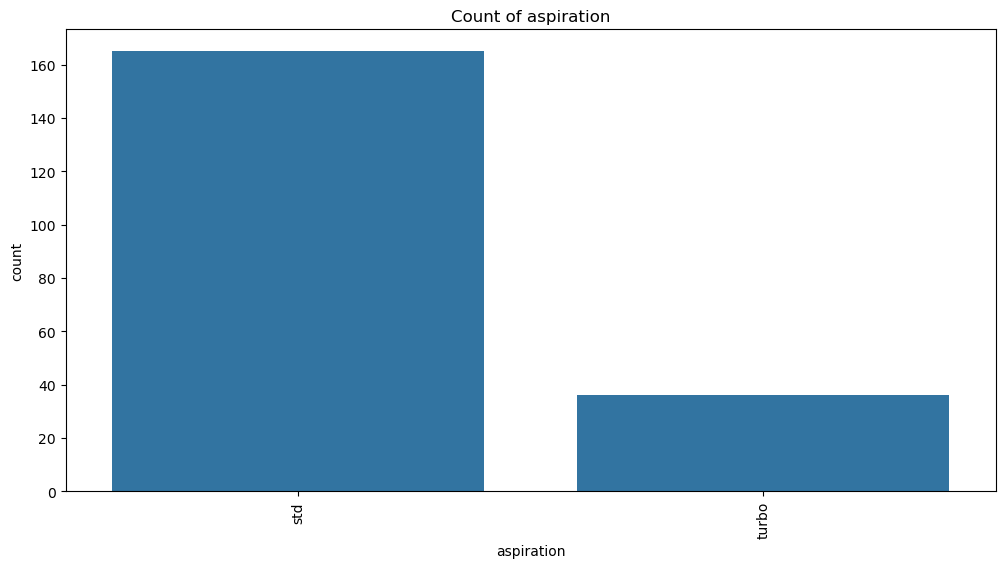

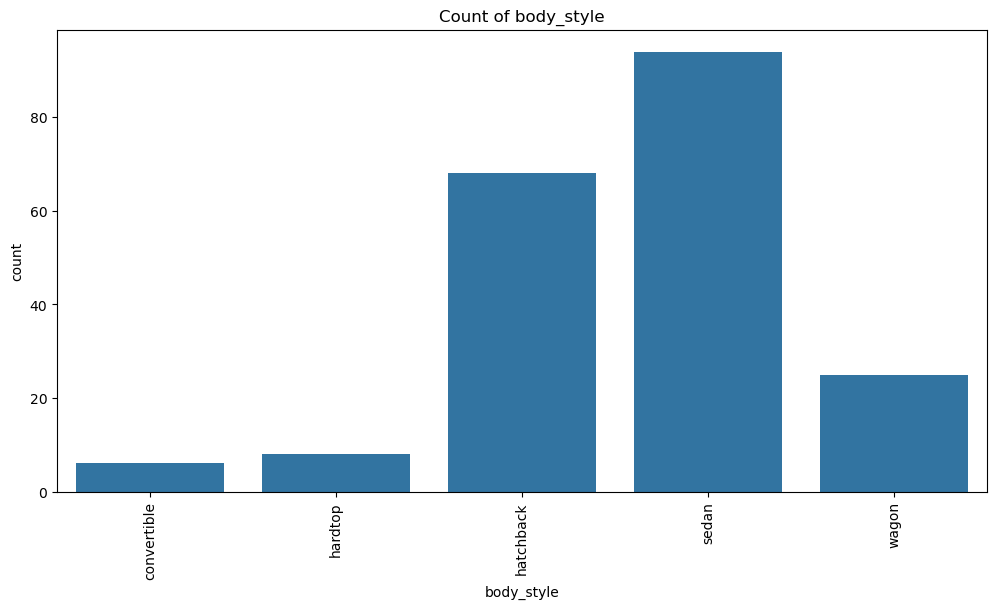

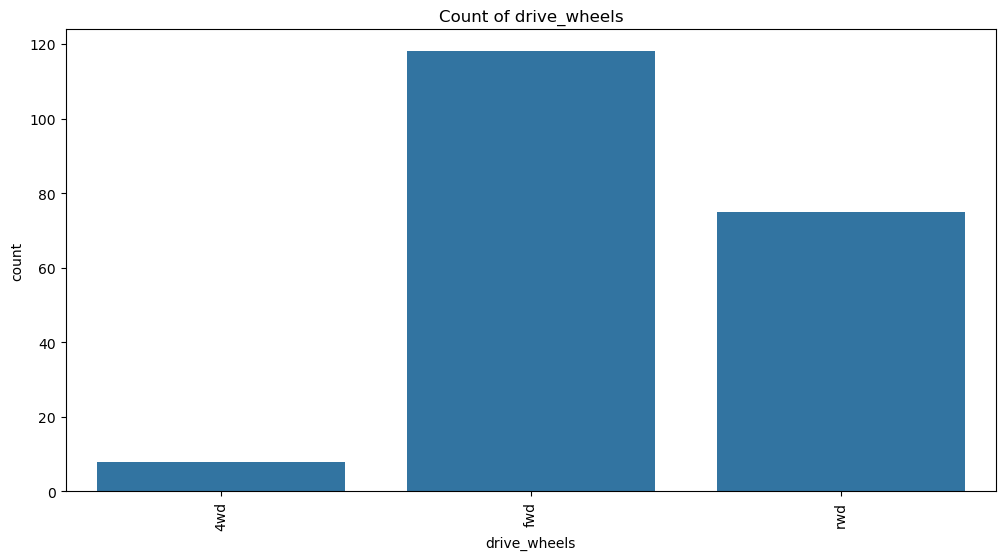

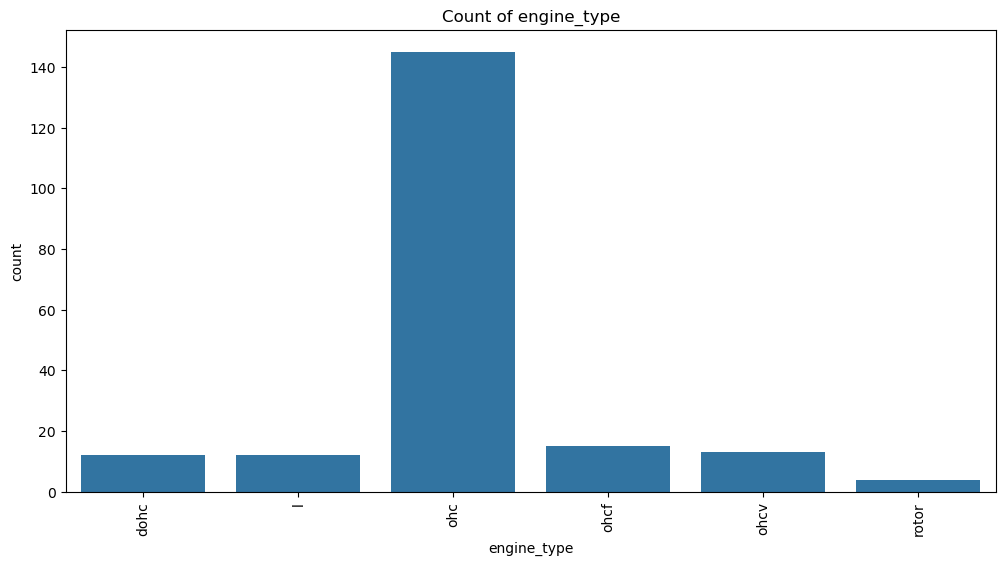

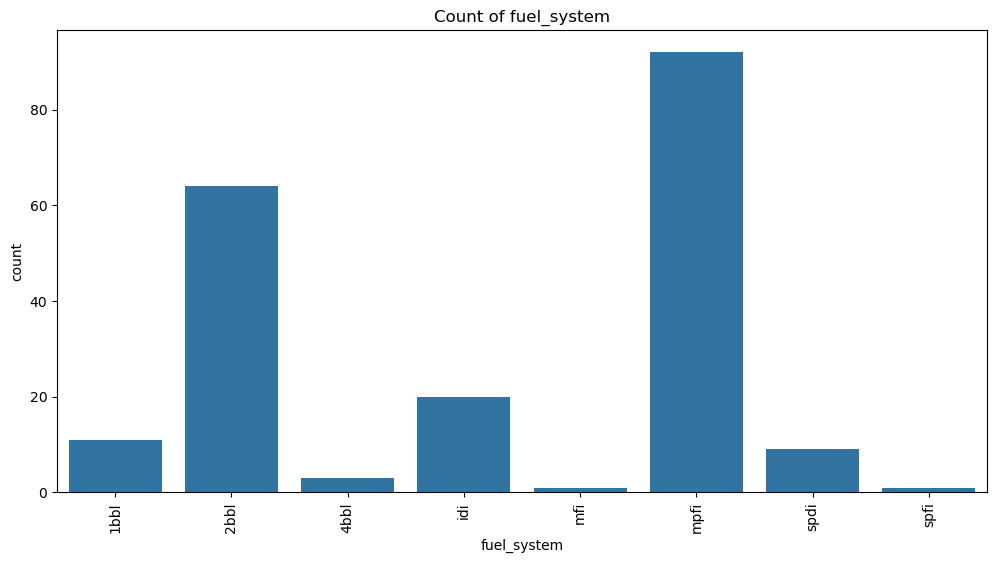

In [16]:
# Univariate Analysis
# Numerical variables
for col in num_cols:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()
    
    plt.figure(figsize=(10,6))
    sns.boxplot(y=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()

# Categorical variables
for col in cat_cols:
    plt.figure(figsize=(12,6))
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=90)
    plt.show()

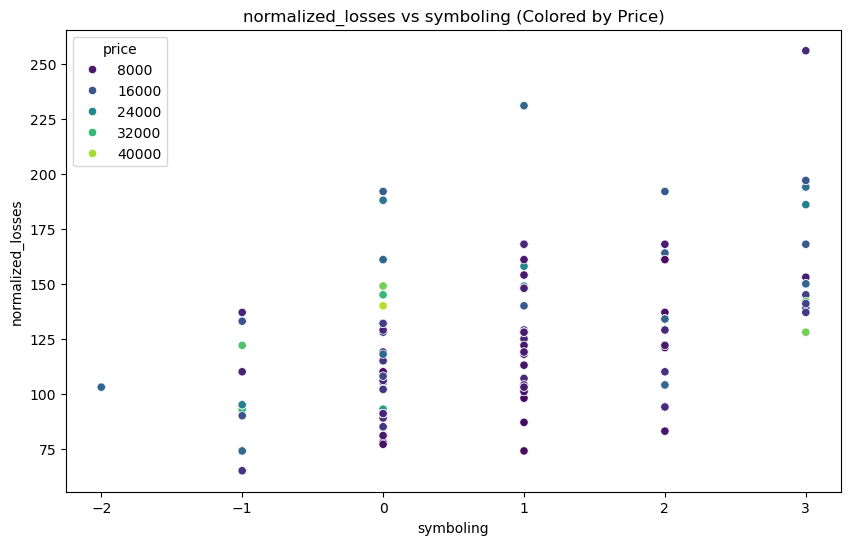

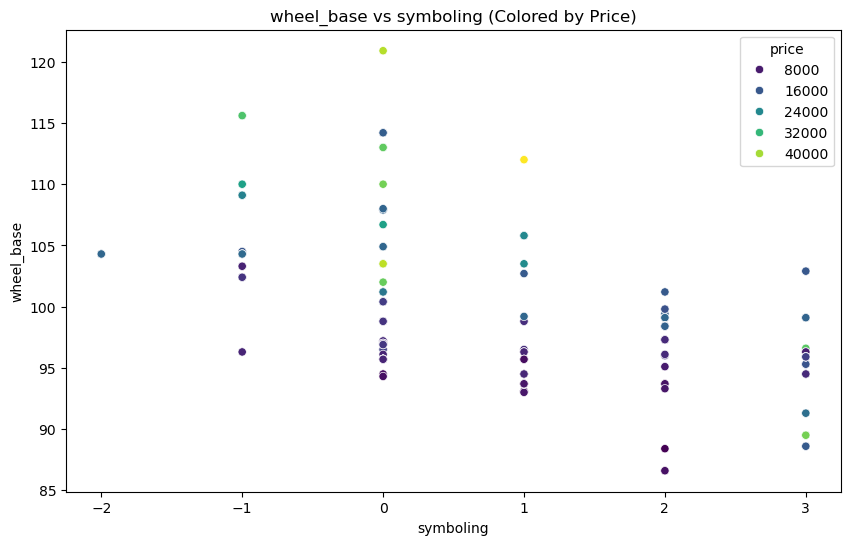

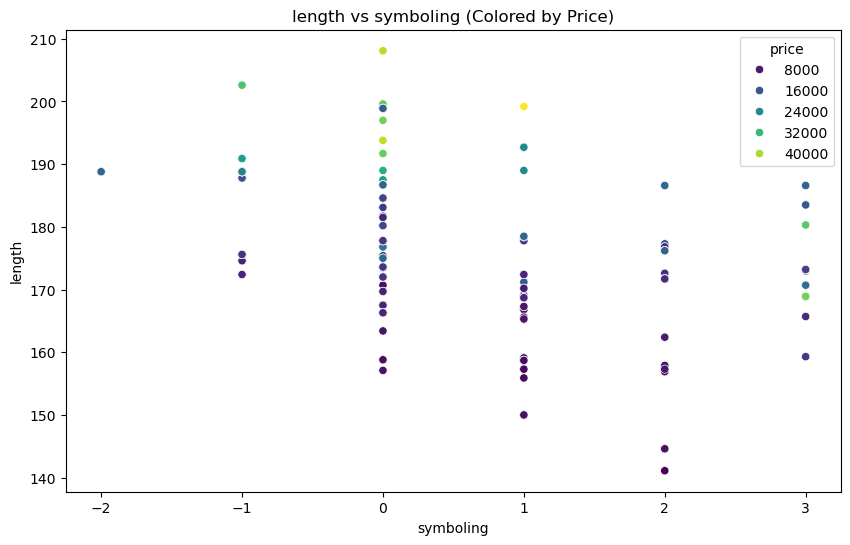

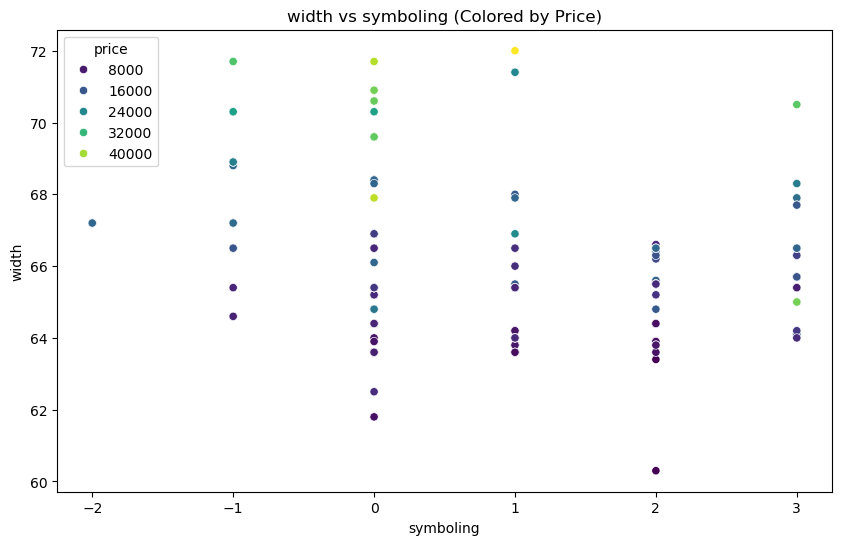

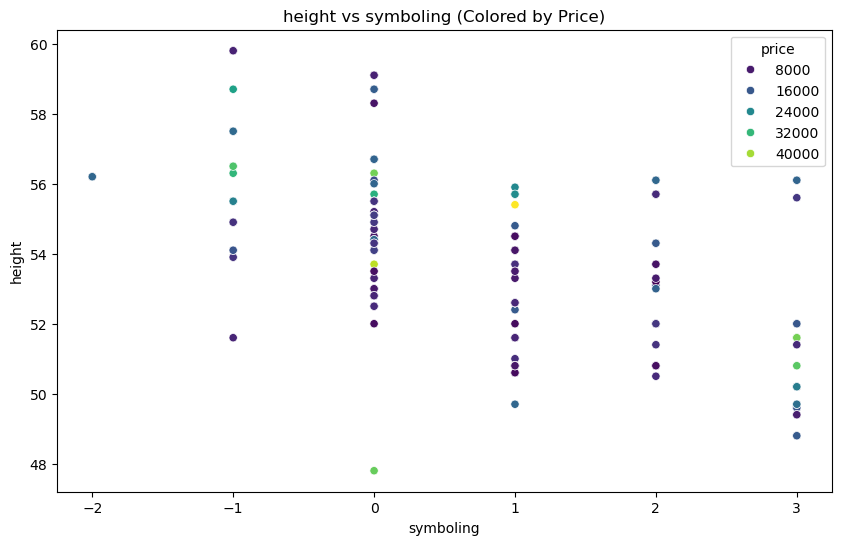

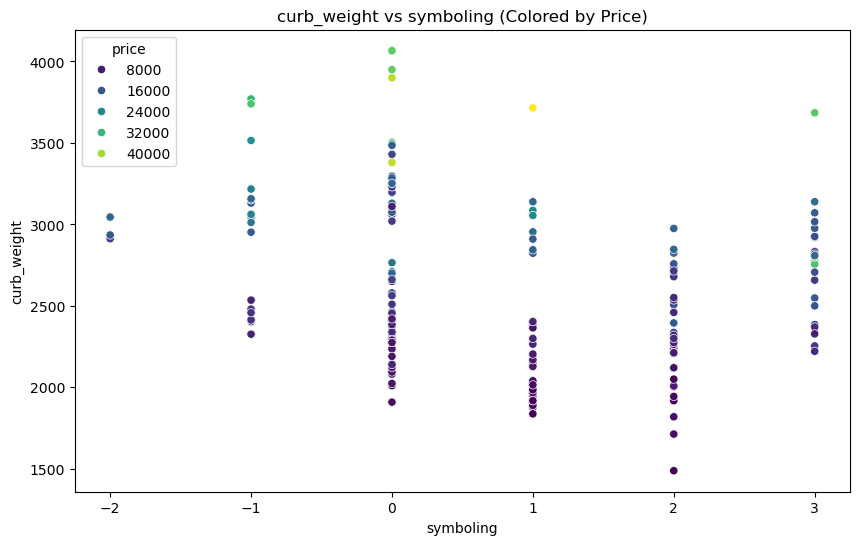

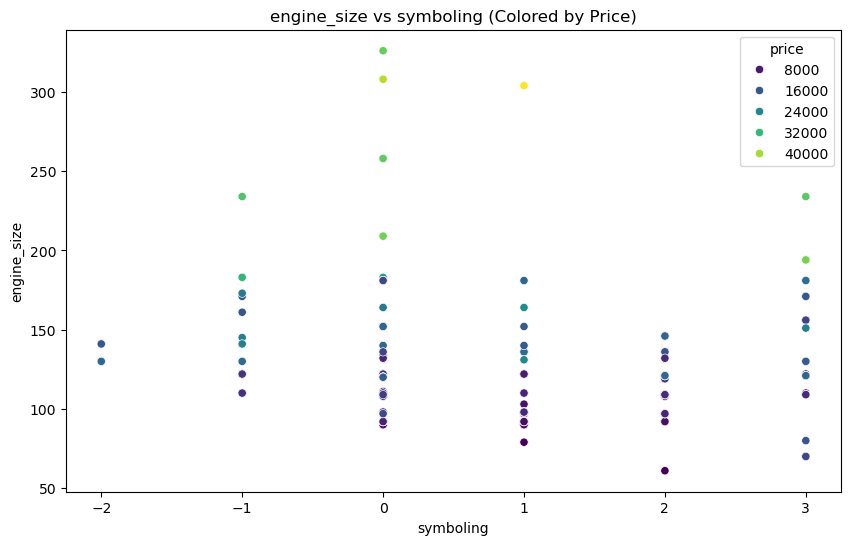

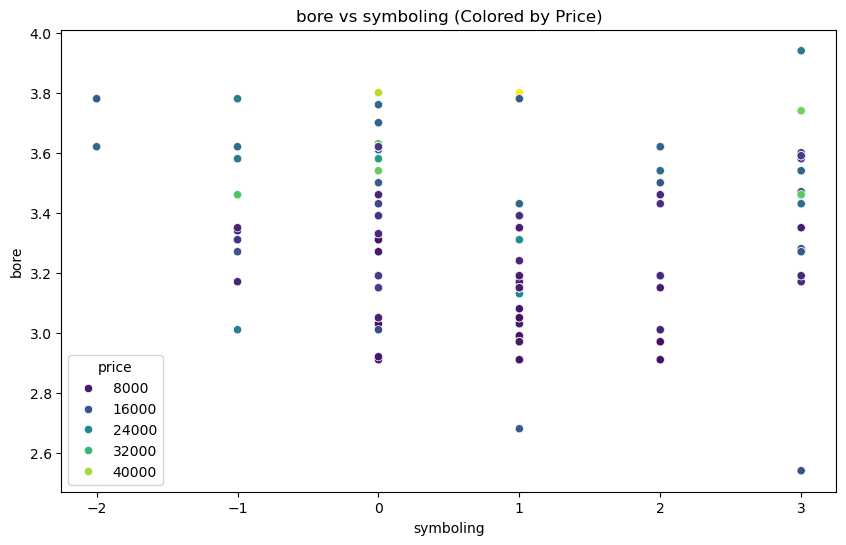

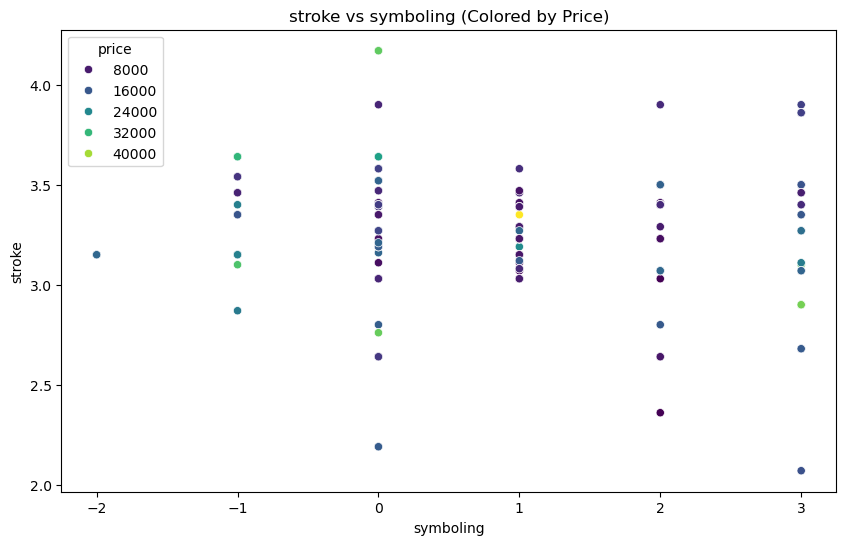

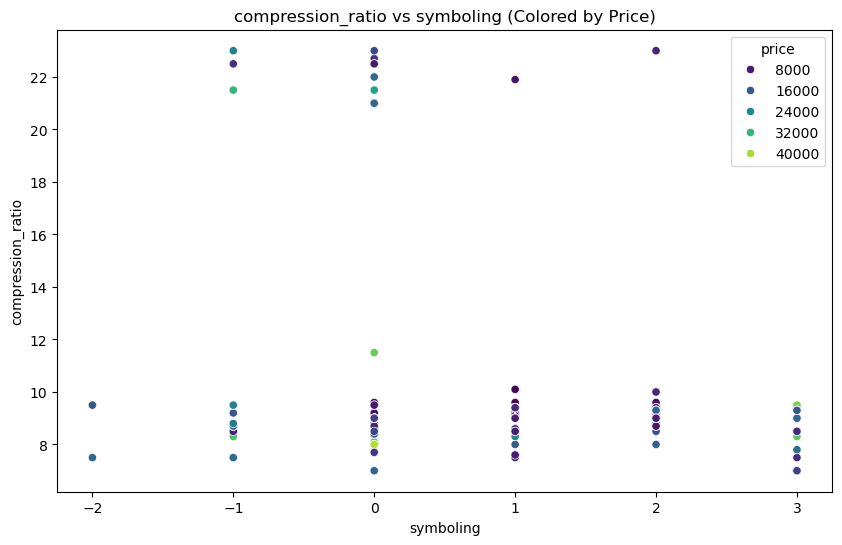

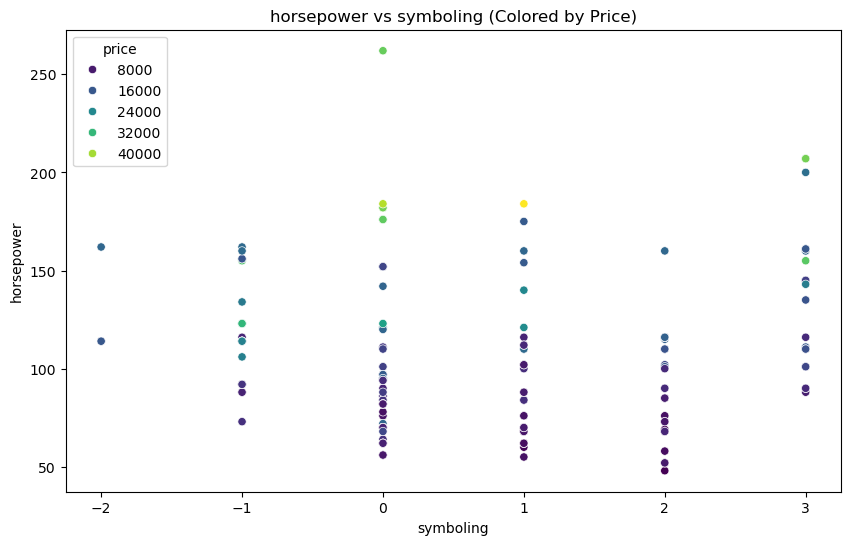

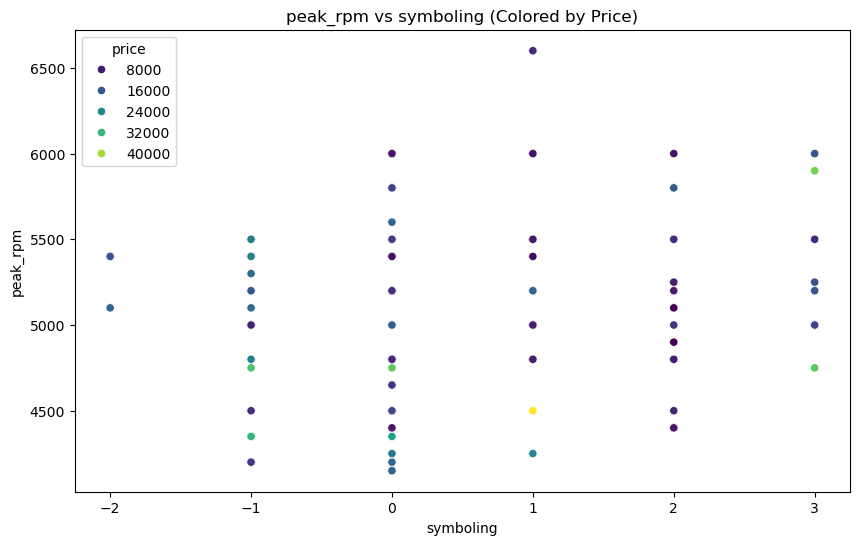

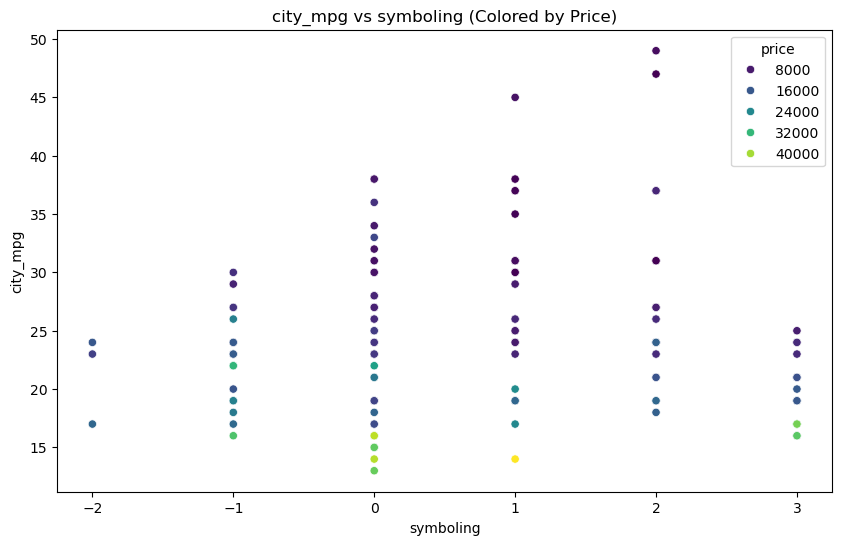

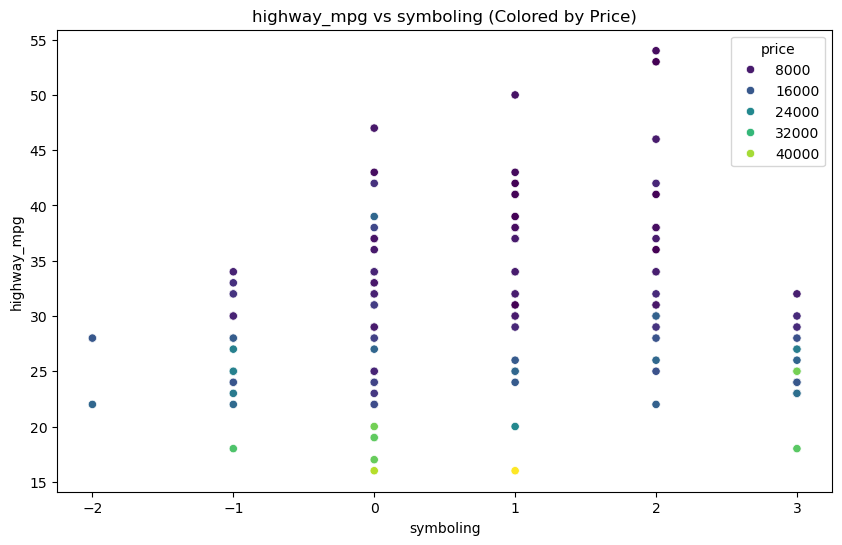

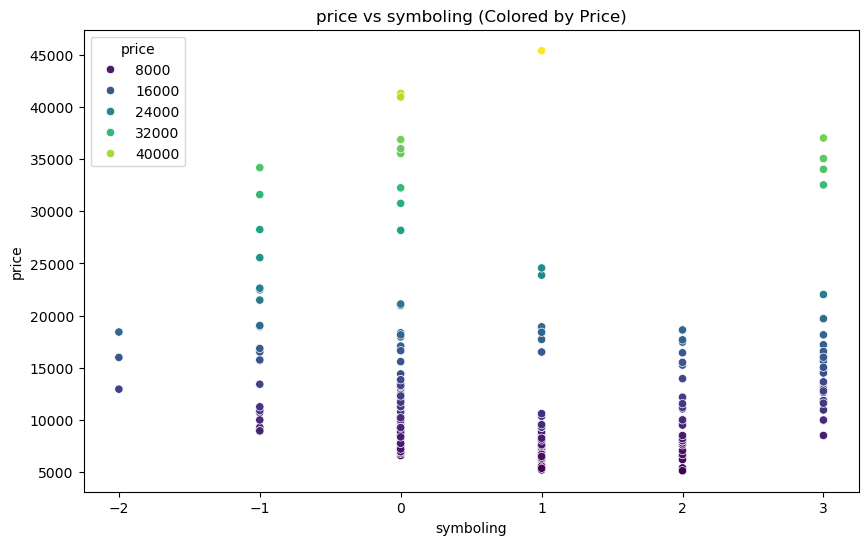

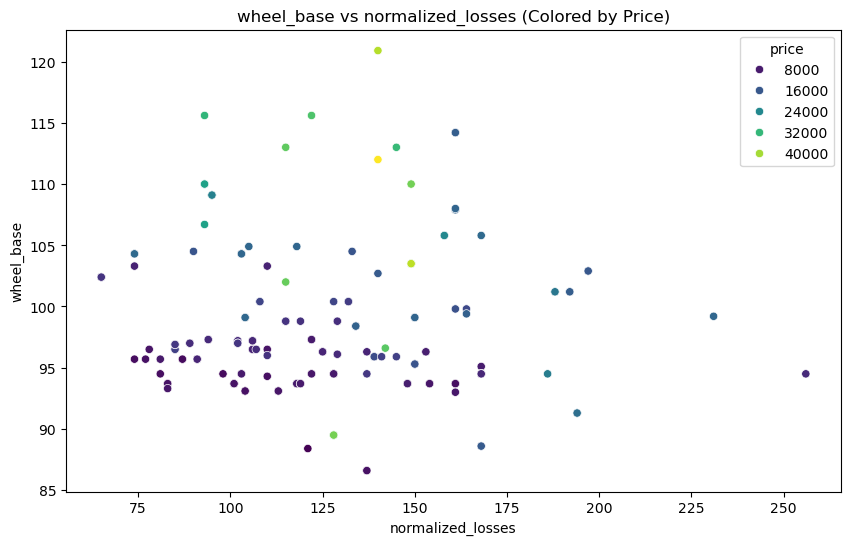

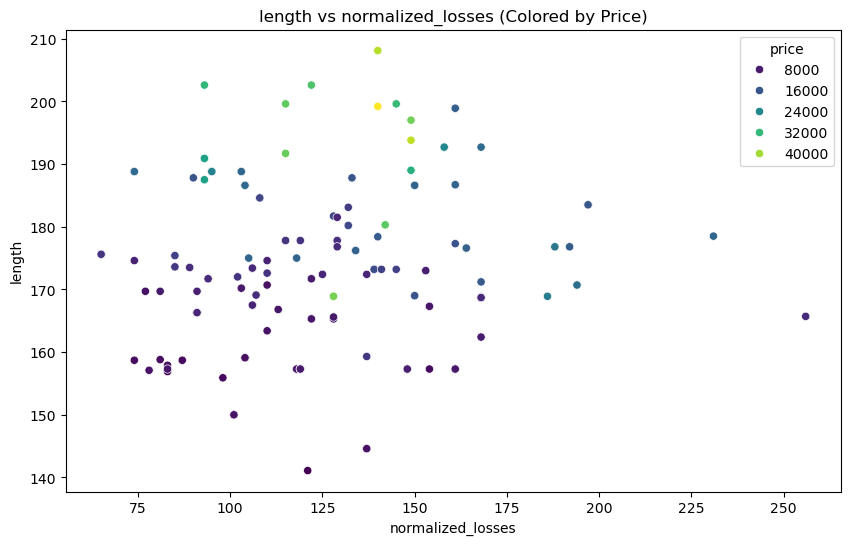

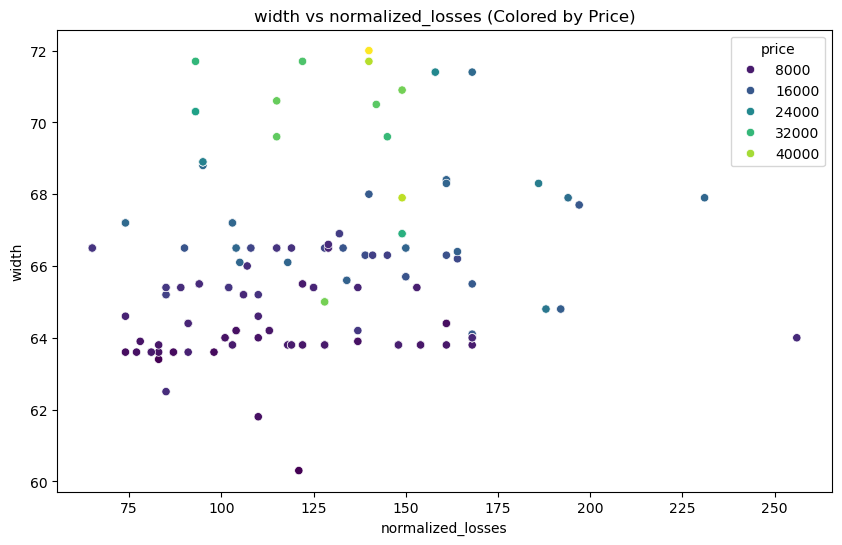

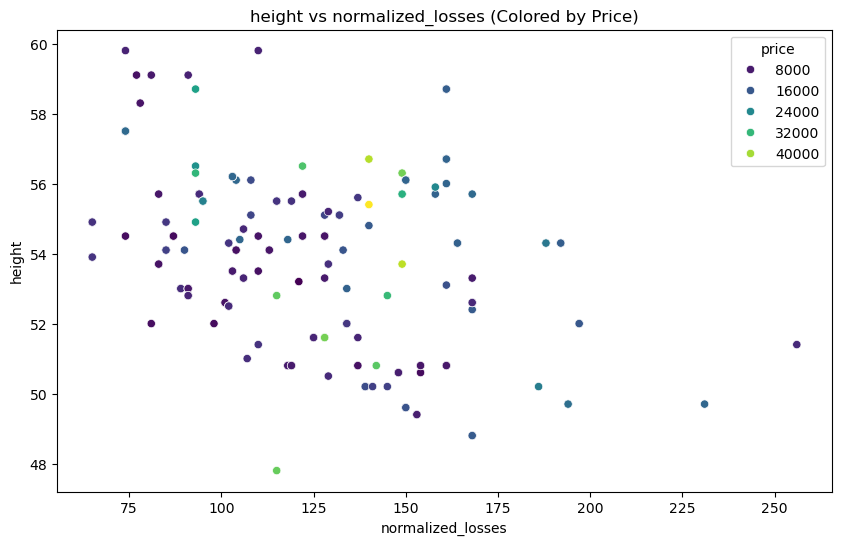

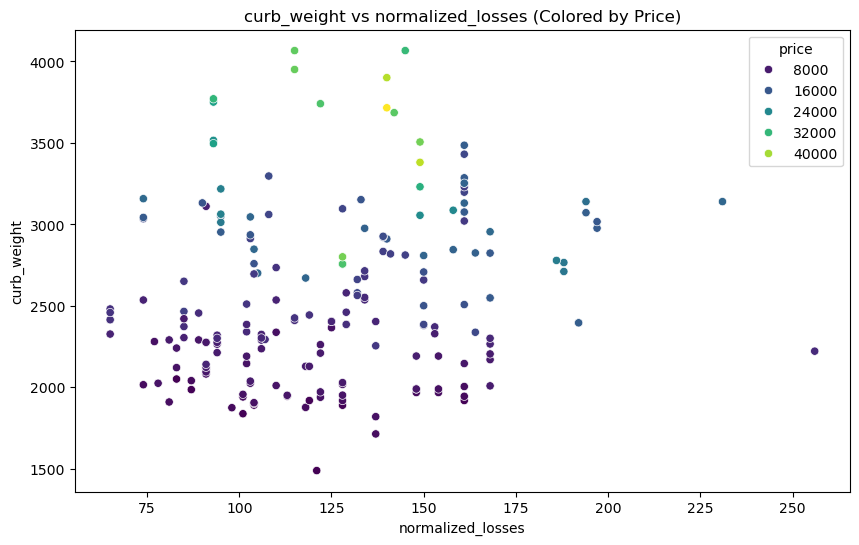

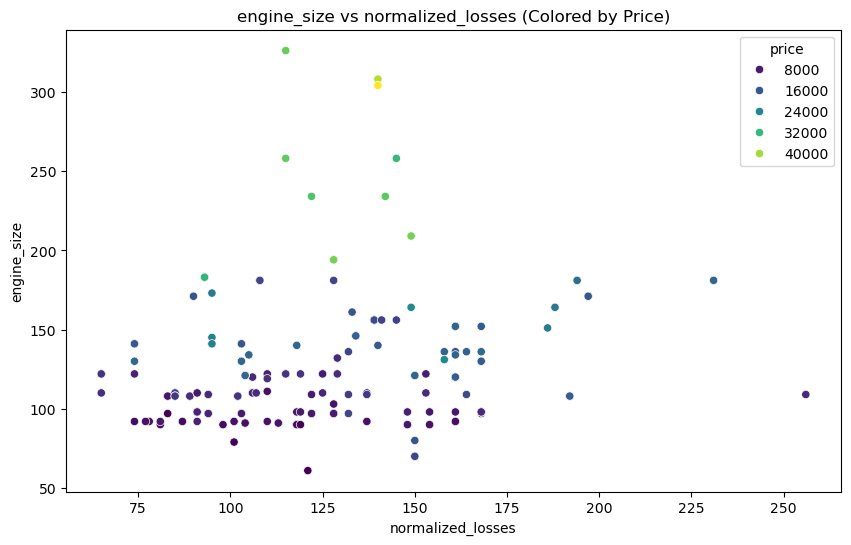

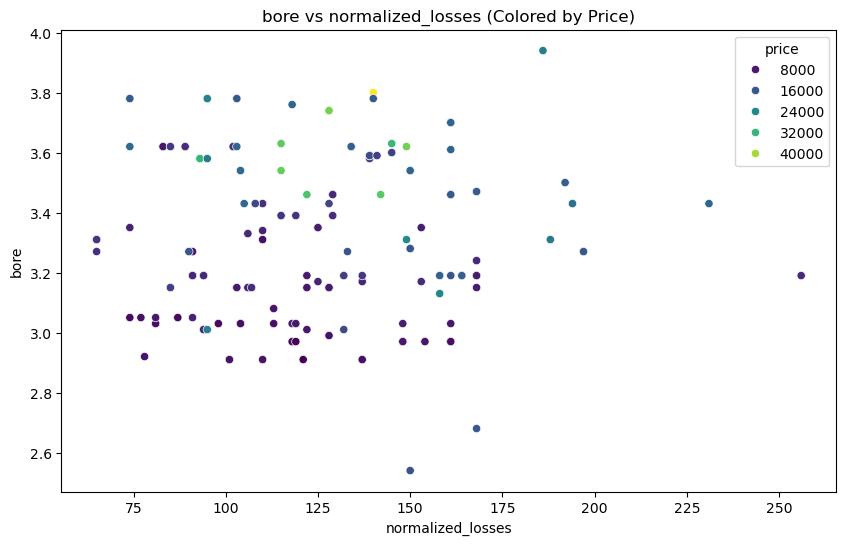

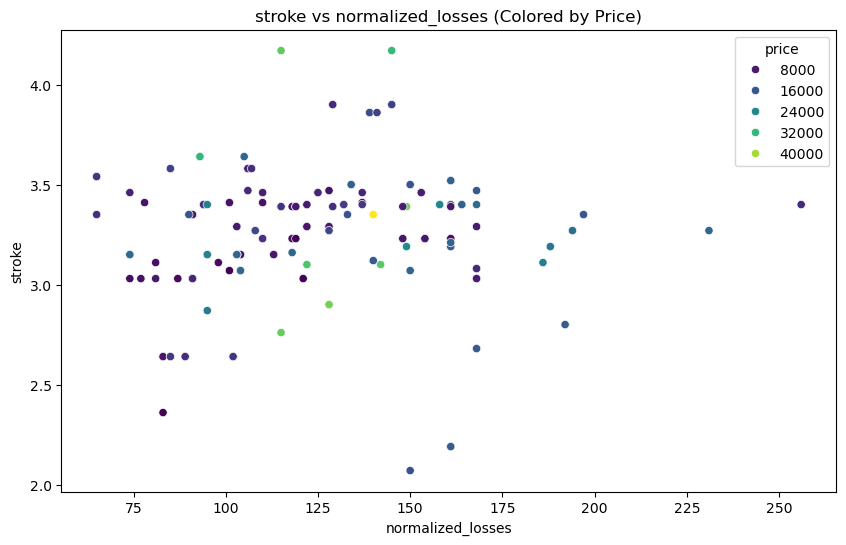

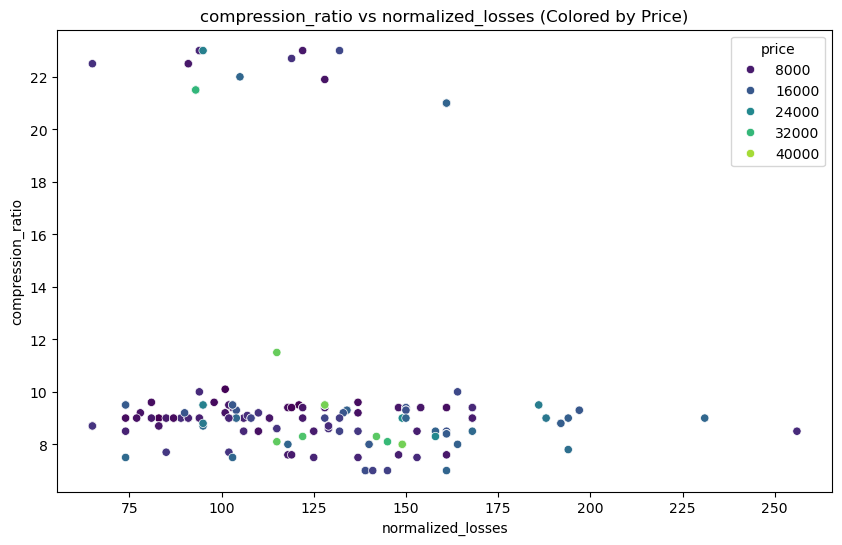

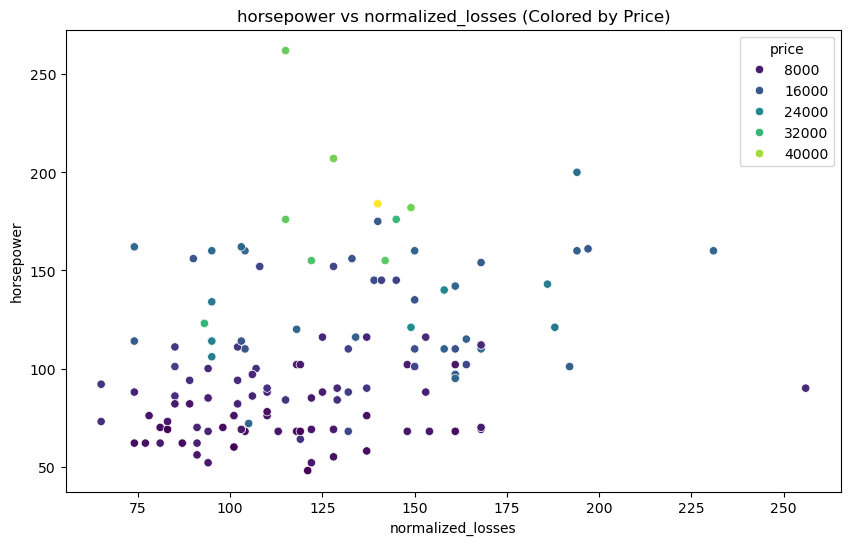

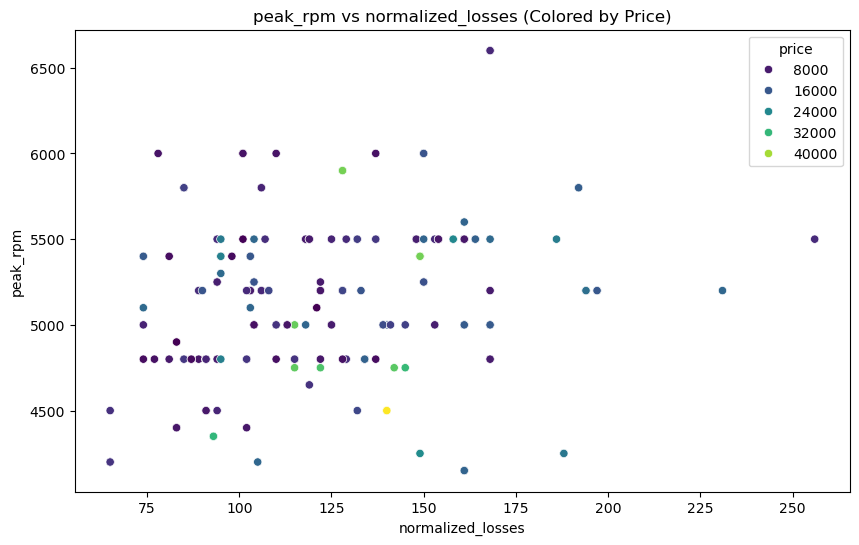

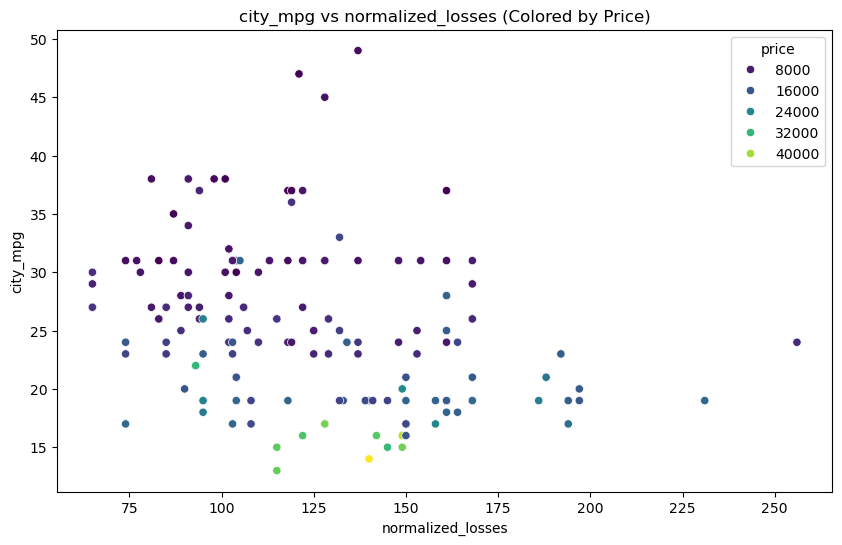

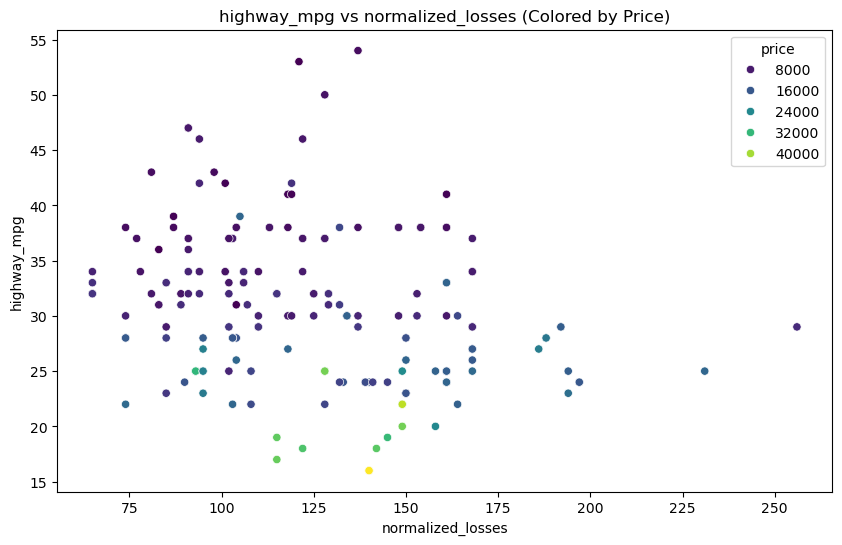

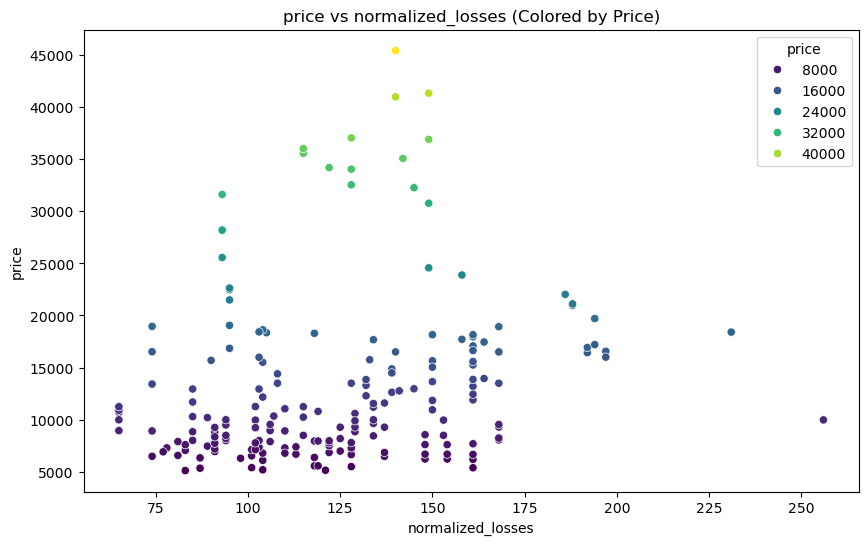

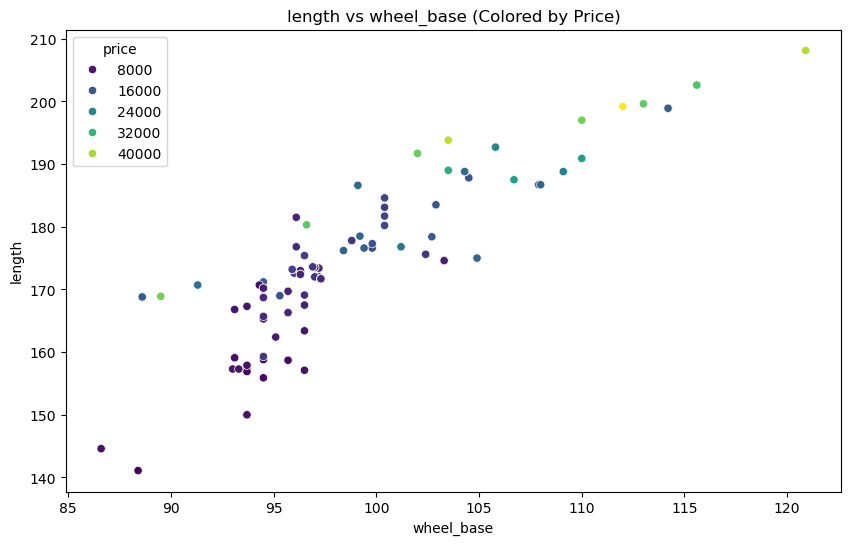

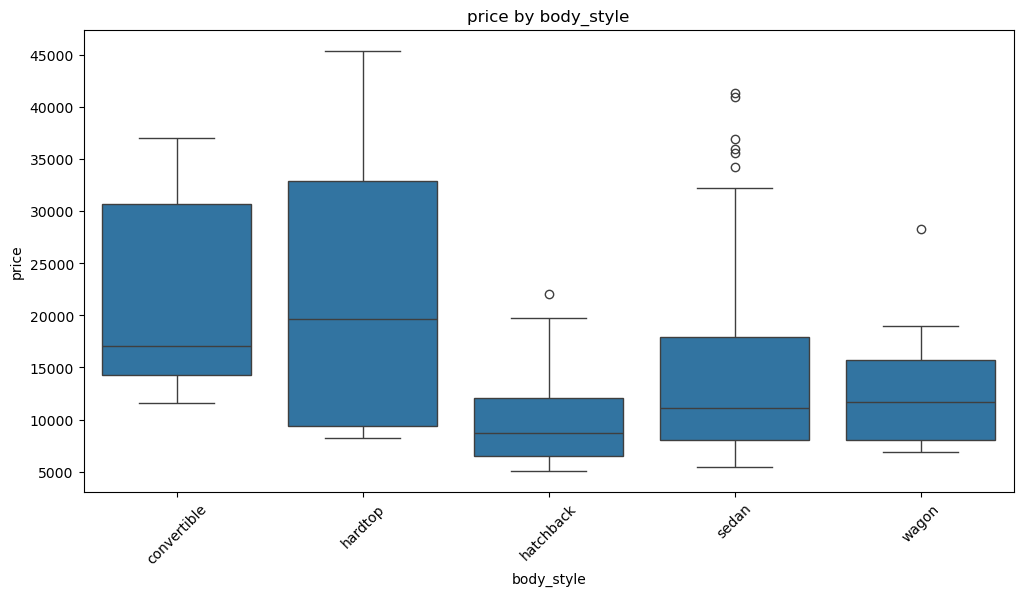

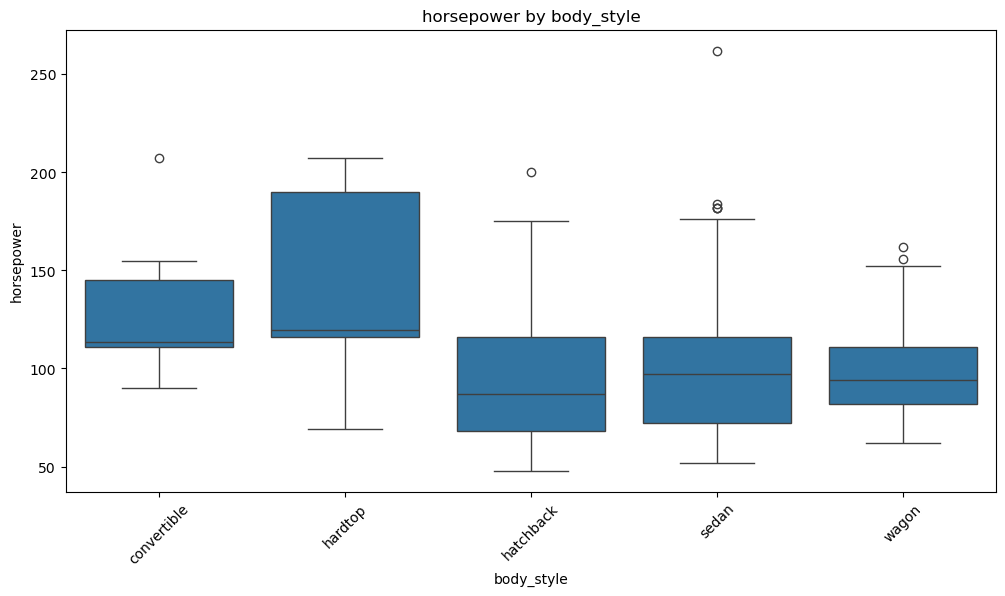

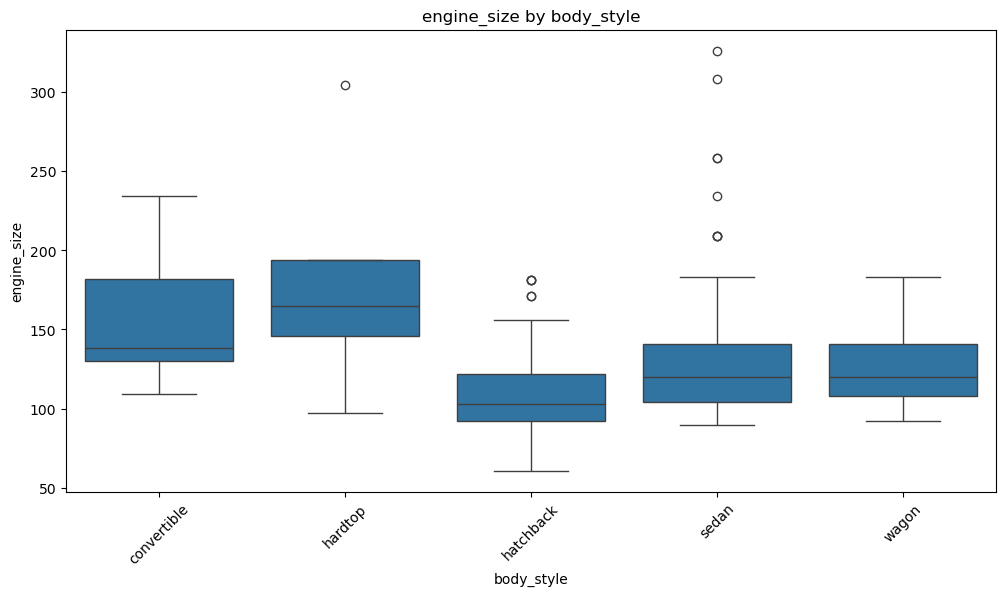

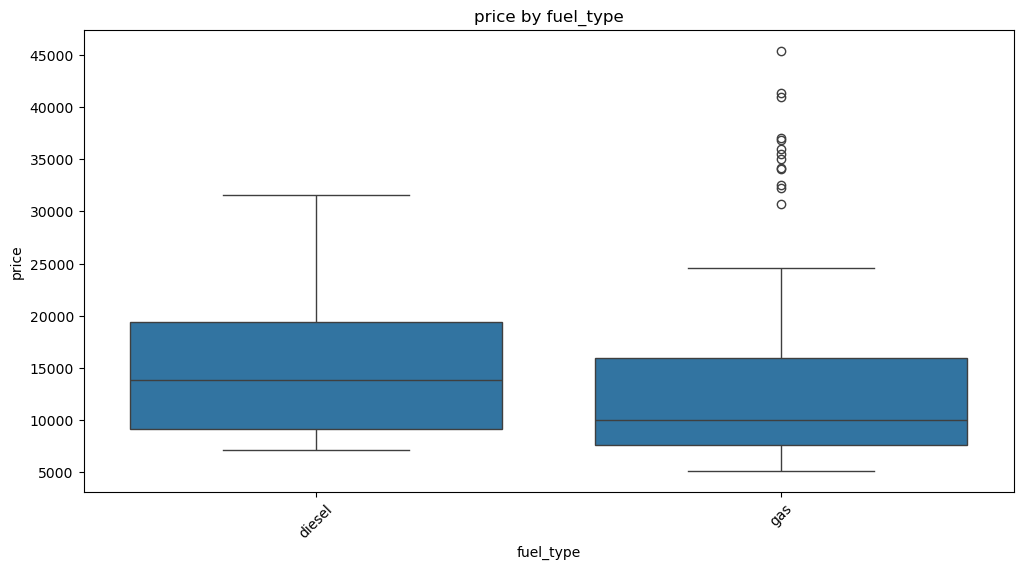

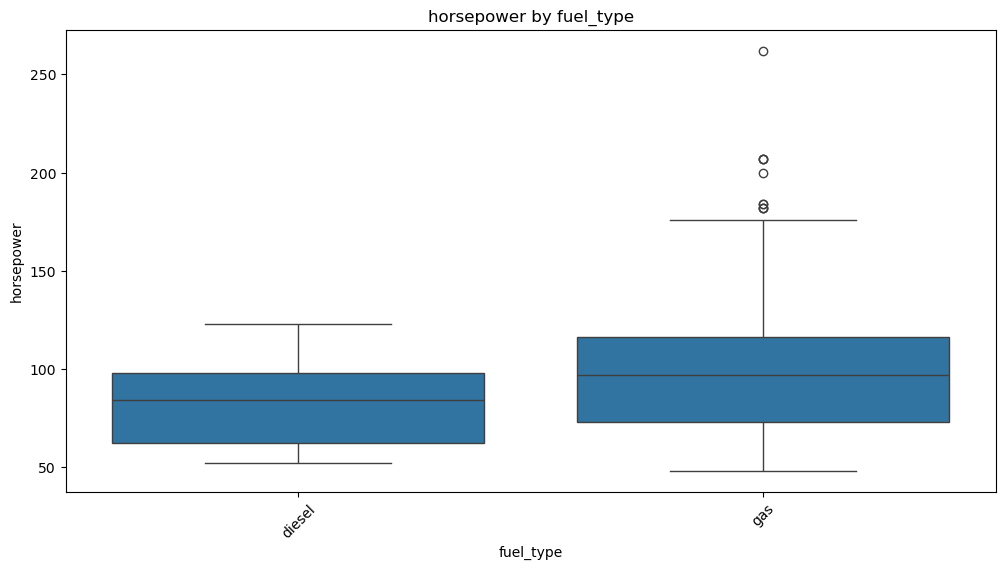

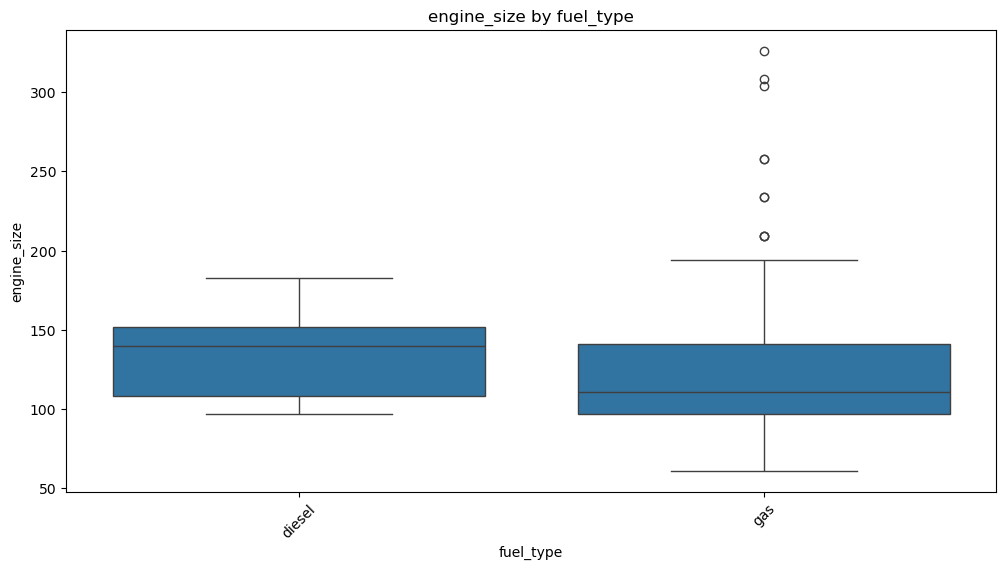

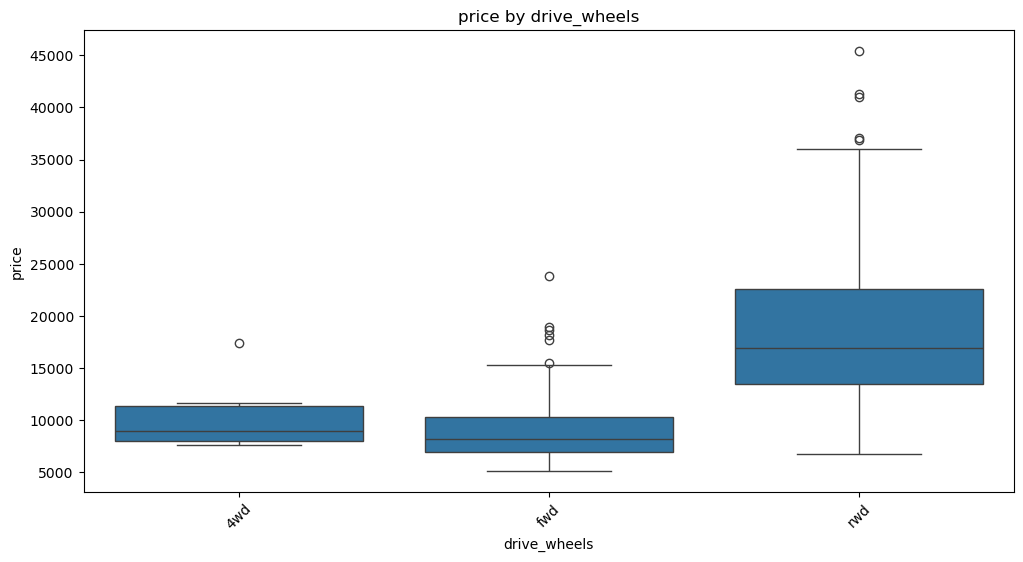

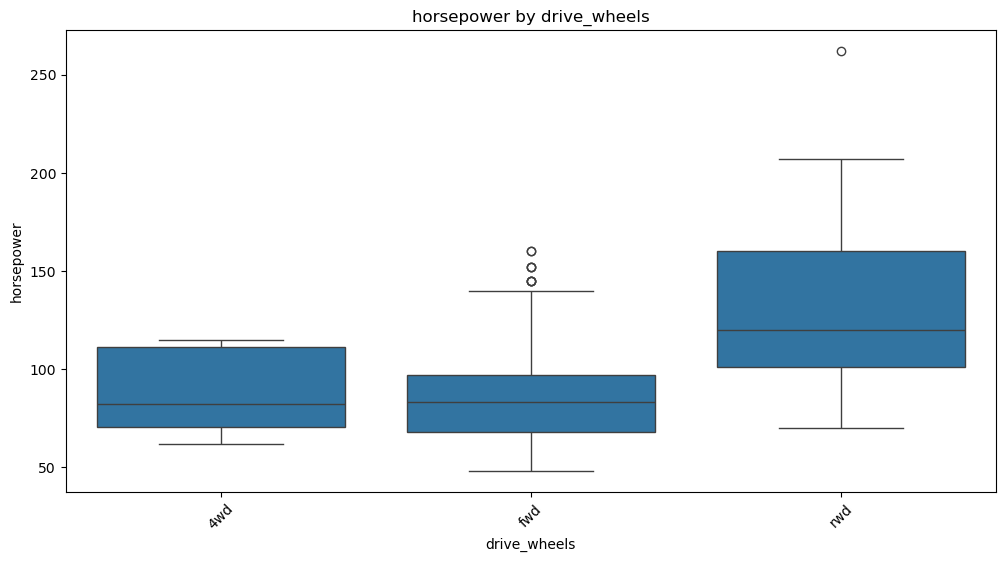

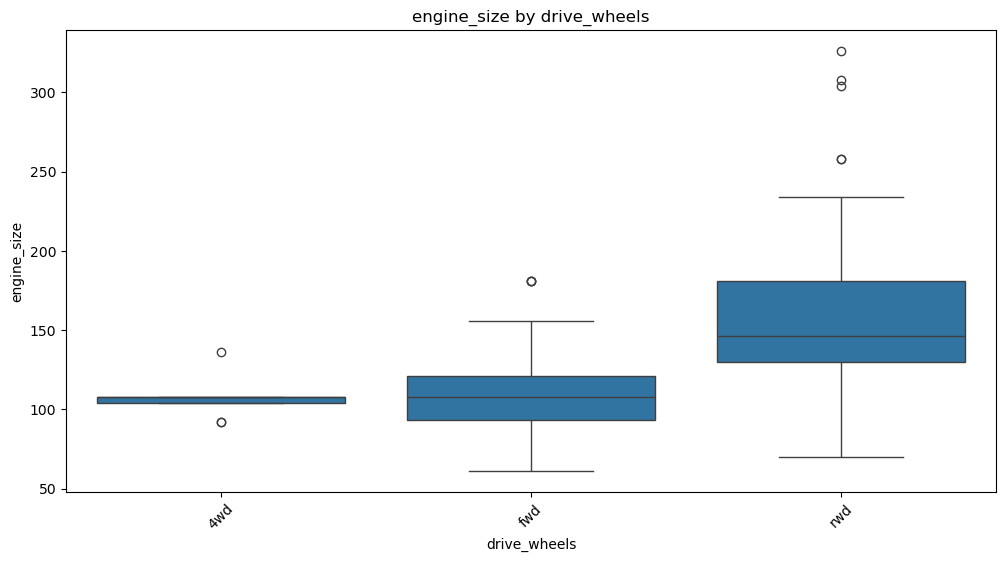

In [20]:
#Bivariate Analysis
# Numerical vs Numerical
num_pairs = list(combinations(num_cols, 2))
for x, y in num_pairs[:30]:  # First 30 pairs for example
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=x, y=y, data=df, hue='price', palette='viridis')
    plt.title(f'{y} vs {x} (Colored by Price)')
    plt.show()

# Categorical vs Numerical
for cat in ['body_style', 'fuel_type', 'drive_wheels']:
    for num in ['price', 'horsepower', 'engine_size']:
        plt.figure(figsize=(12,6))
        sns.boxplot(x=cat, y=num, data=df)
        plt.title(f'{num} by {cat}')
        plt.xticks(rotation=45)
        plt.show()

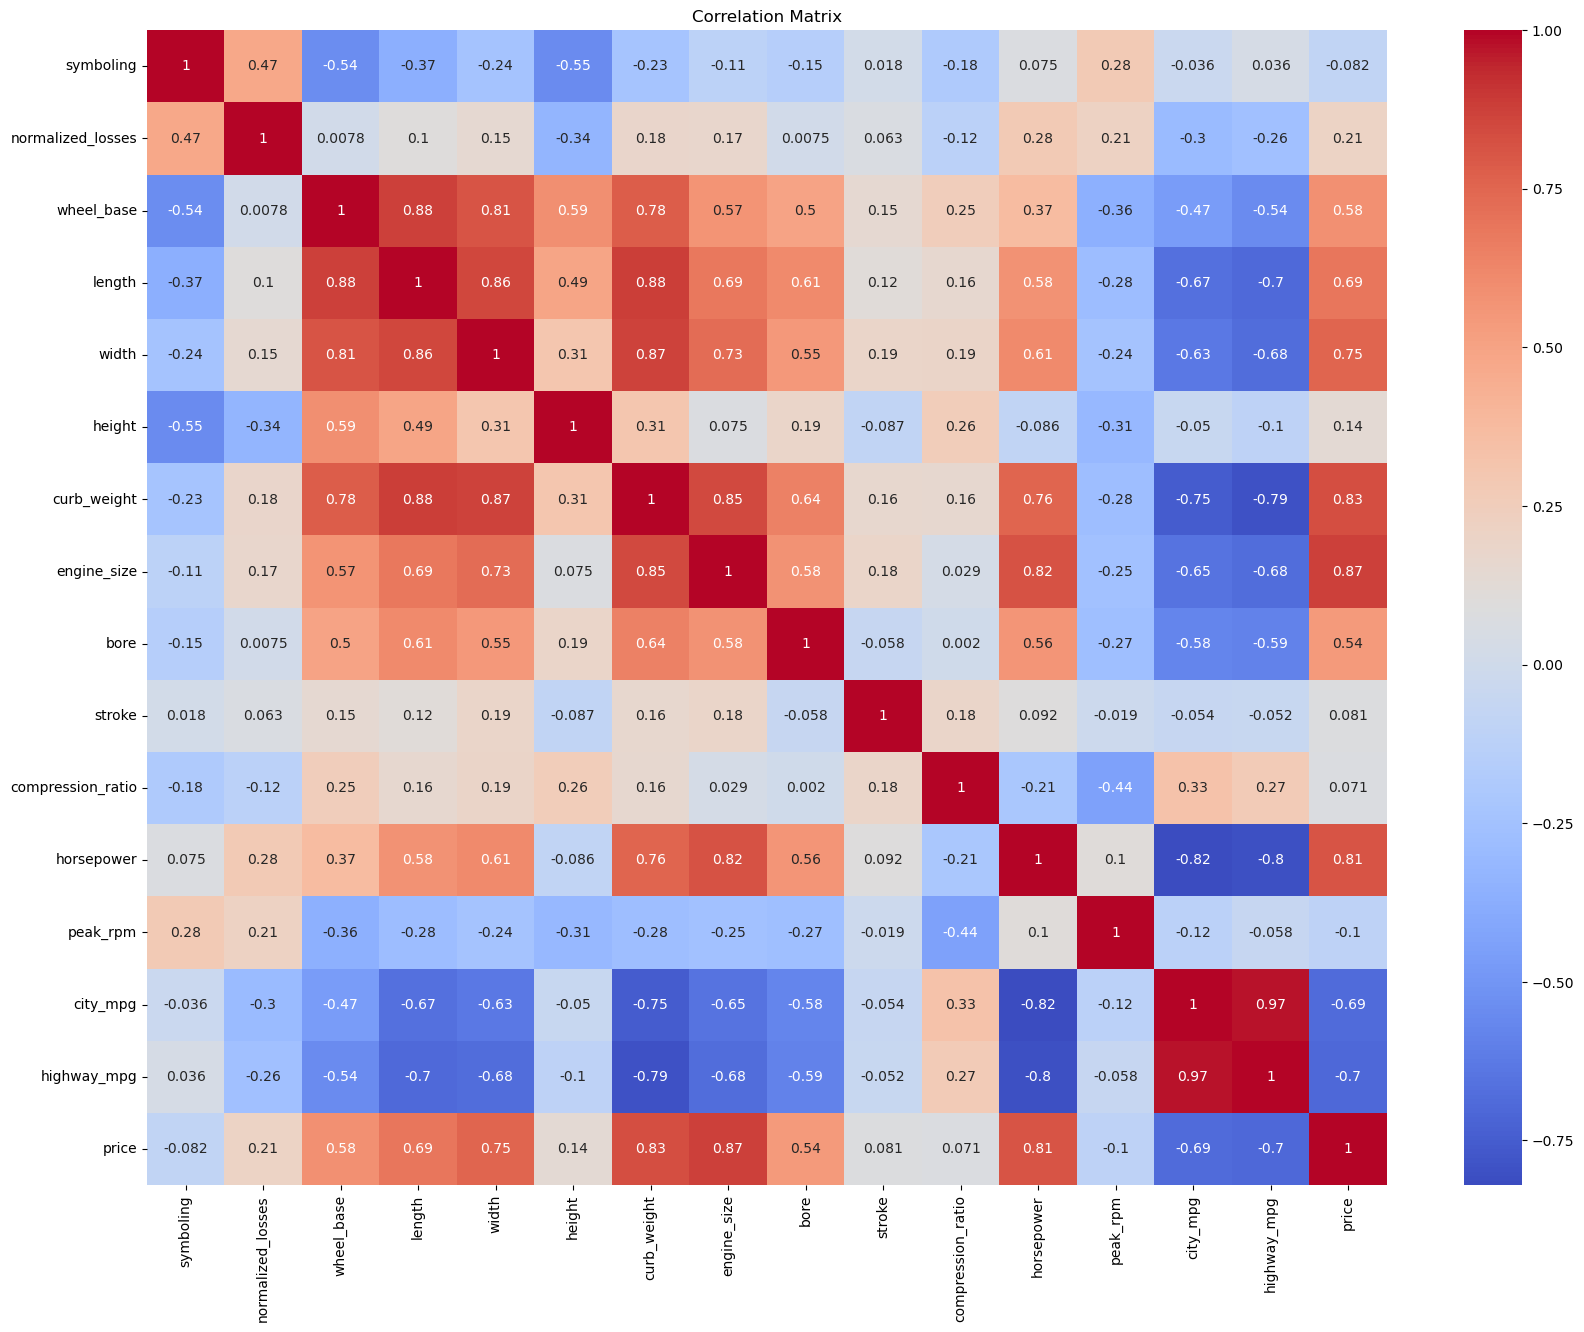

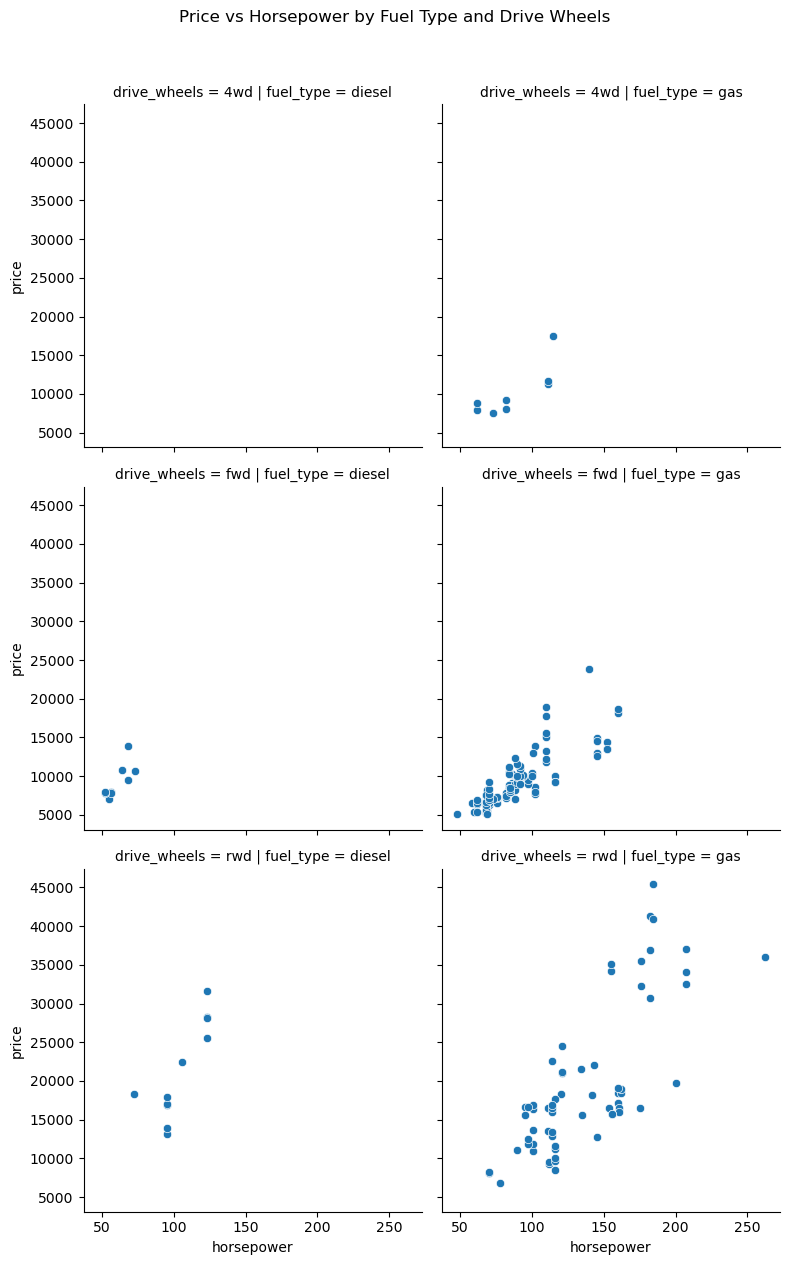

In [22]:
#Multivariate Analysis
# Correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Faceted analysis
g = sns.FacetGrid(df, col='fuel_type', row='drive_wheels', height=4)
g.map(sns.scatterplot, 'horsepower', 'price')
g.fig.suptitle('Price vs Horsepower by Fuel Type and Drive Wheels', y=1.05)
plt.show()

In [26]:
#Body Style Economics
body_style_stats = df.groupby('body_style')['price'].agg(['mean', 'count'])
print(body_style_stats.sort_values('mean', ascending=False))

                     mean  count
body_style                      
hardtop      22208.500000      8
convertible  21890.500000      6
sedan        14459.755319     94
wagon        12371.960000     25
hatchback     9957.441176     68


C:\Users\hp\AppData\Local\Temp\ipykernel_6068\13081241.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  body_style_stats = df.groupby('body_style')['price'].agg(['mean', 'count'])


In [28]:
#final dataset export
# One-hot encode for machine learning
df_final = pd.get_dummies(df, columns=categorical_cols)

# Save cleaned data
df_final.to_csv('automobile_processed_final.csv', index=False)
print("\nFinal dataset saved with shape:", df_final.shape)


Final dataset saved with shape: (201, 70)
